
### Q1. Import the CarPrice_Assignment dataset

In [1]:
#importing all neccesary libraries realated to loading dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loadig the dataset and analysing it.
df=pd.read_csv('CarPrice_Assignment.csv')
df.shape #it has 205 rows and 26 columns
df.info(verbose=False) #10 are object dtype columns
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 26 entries, car_ID to price
dtypes: float64(10), int64(6), object(10)
memory usage: 41.8+ KB


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,196.000000,201.000000,202.000000,46.000000,205.000000,185.000000,205.000000,205.000000,205.000000,205.000000,205.000000,197.000000,205.000000,205.000000
mean,103.000000,0.834146,99.001020,174.061692,65.868317,53.069565,2555.565854,122.972973,3.329756,3.255415,10.142537,104.117073,5125.121951,24.994924,30.751220,13276.710571
std,59.322565,1.245307,5.962911,12.450336,2.126120,2.308234,520.680204,36.438219,0.270844,0.313597,3.972040,39.544167,476.985643,6.209356,6.886443,7988.852332
min,1.000000,-2.000000,88.400000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.025000,50.850000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.100000,173.200000,65.500000,53.150000,2414.000000,110.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.500000,66.500000,54.300000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [3]:
#function to show scale of each column

def check_column_scale(df):
    def unit(x):
        if x <=10:
            return '1s'
        elif x > 11 and x<999:
            return '100s'
        else:
            return '1000s'
          
    df_scale=df.loc['max',:].reset_index().rename({'index':'columnnames'}) #here reset index code in converting the pandas series index into a colum making in dataframe
    df_scale['scale_unit']=df_scale['max'].apply(unit) #here apply function is to create a new column basis on existing column data
    return df_scale



In [4]:
# checking the scale of each column 

check_column_scale(df.describe()) #shows columns are divided in 3 unit scales(1's,100's,1000's)

,index,max,scale_unit
0,car_ID,205.00,100s
1,symboling,3.00,1s
2,wheelbase,120.90,100s
3,carlength,208.10,100s
4,carwidth,72.30,100s
5,carheight,59.80,100s
6,curbweight,4066.00,1000s
7,enginesize,326.00,100s
8,boreratio,3.94,1s
9,stroke,4.17,1s


### Q2. Check if there are any missing values in the dataset. If yes, treat the missing values

In [5]:
#removing spaces in columns names if any
df.columns=df.columns.str.replace(' ','')

#seperating columns as per data type

num_col= df.select_dtypes(include=np.number).columns
print(num_col)
cat_col= df.select_dtypes(exclude=np.number).columns
print(f' categorical column : \n {cat_col}')

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
 categorical column : 
 Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


,index,missingcount,missingpercen
0,car_ID,0,0.000000
1,symboling,0,0.000000
2,CarName,0,0.000000
3,fueltype,0,0.000000
4,aspiration,0,0.000000
5,doornumber,0,0.000000
6,carbody,0,0.000000
7,drivewheel,0,0.000000
8,enginelocation,0,0.000000
9,wheelbase,9,4.390244


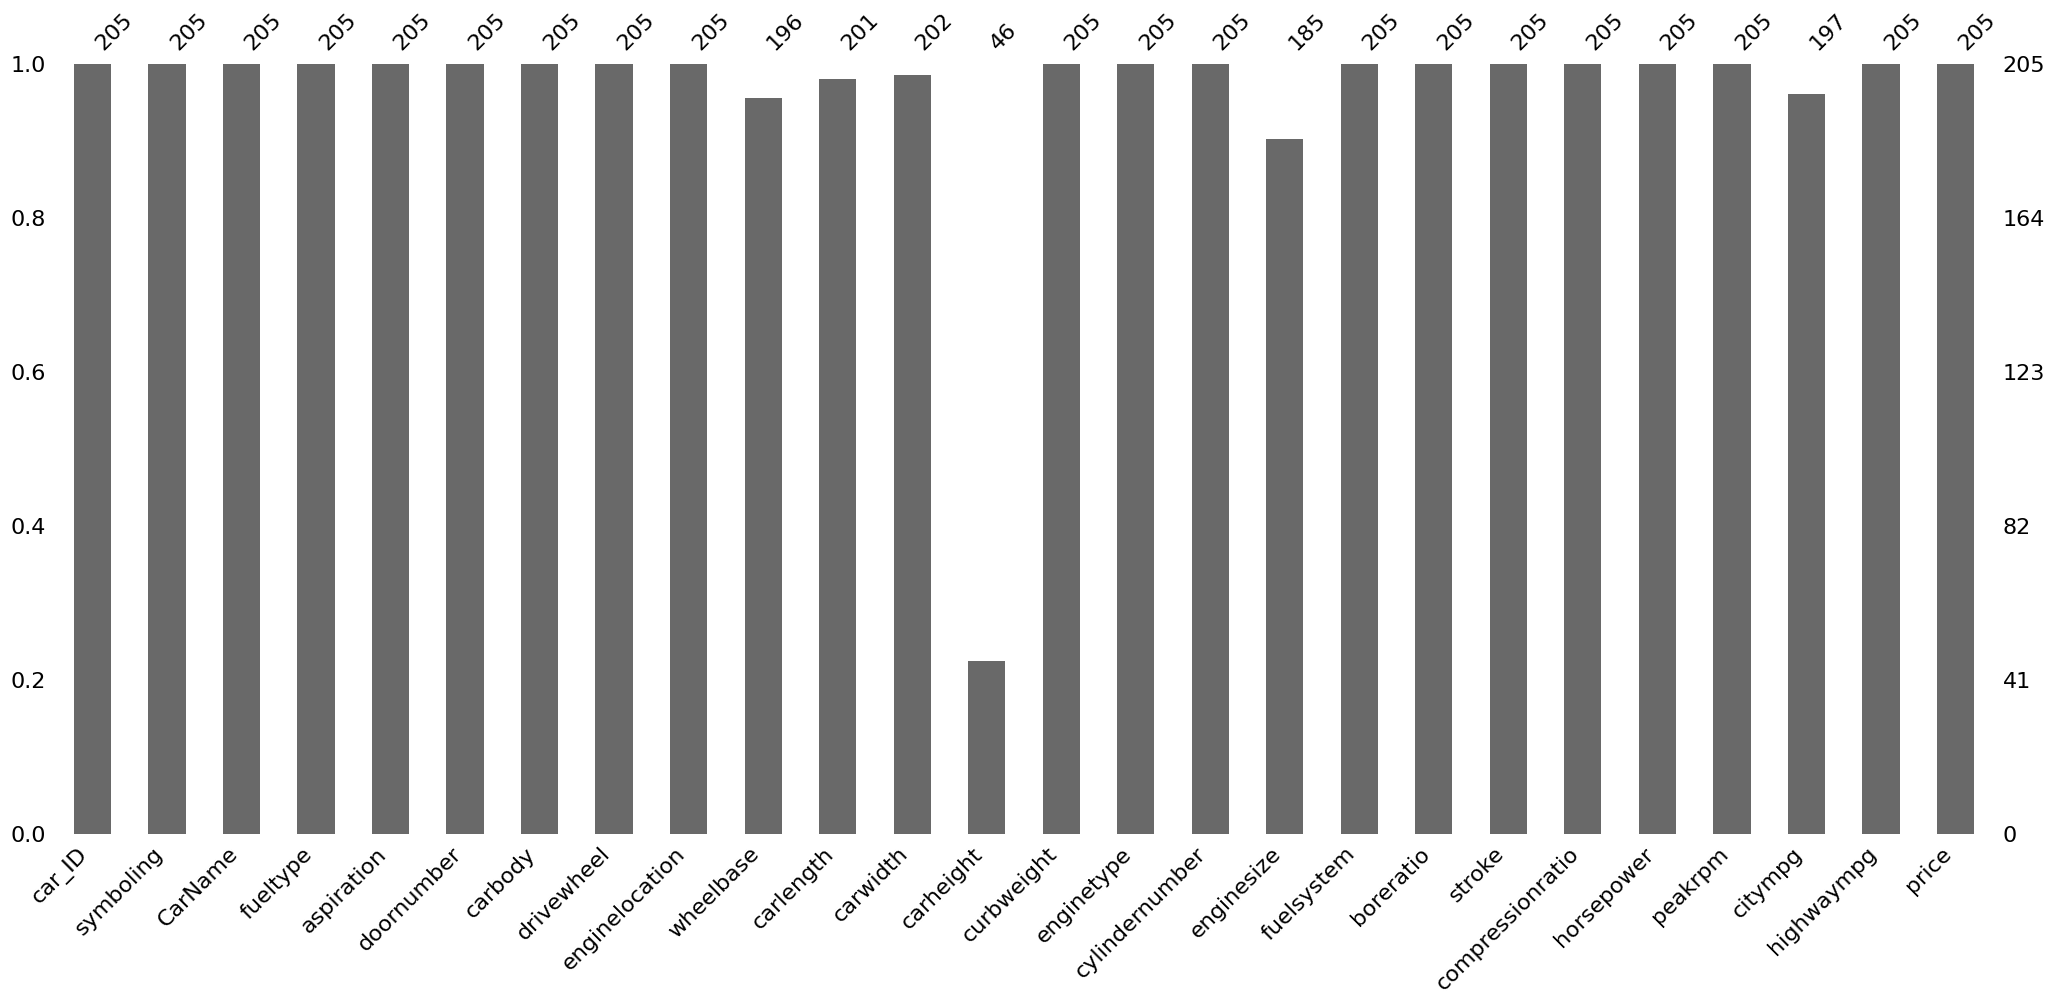

In [6]:
#checking the missing values in dataset

import missingno as msno
msno.bar(df)
df_missing =df.isna().sum().reset_index(name='missingcount')
df_missing['missingpercen']=df_missing['missingcount'].apply(lambda x: (x/df.shape[0])*100) #this code gives the missing values in percentage
df_missing=df_missing.style.apply(lambda x : [None,None, 'background-color:red'] if x['missingpercen'] > 0 else [None,None,None],axis=1)
df_missing


interference- we will drop all the columns where missing percentage is more than 10 % and for all others we will impute missing values
1) carheight has more than 70% missing values , before dropping ,lets also check its significance.


<Axes: >

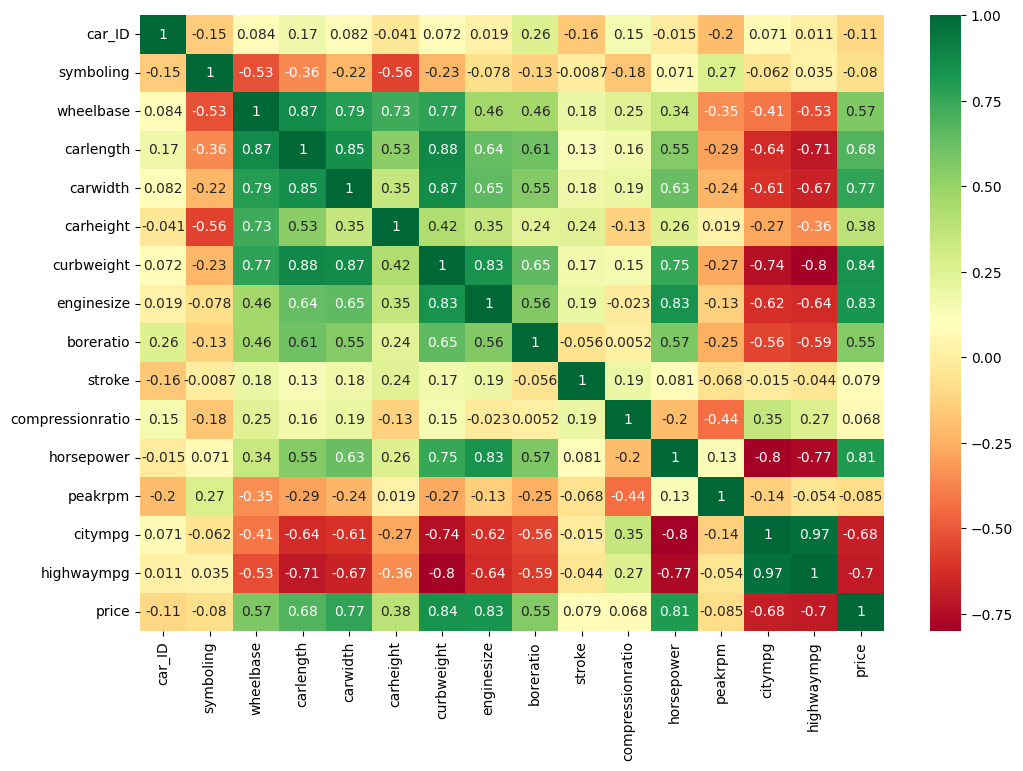

In [7]:
#significance of carheight and target variable (car price)
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df[num_col].corr(),annot=True,cmap='RdYlGn',)


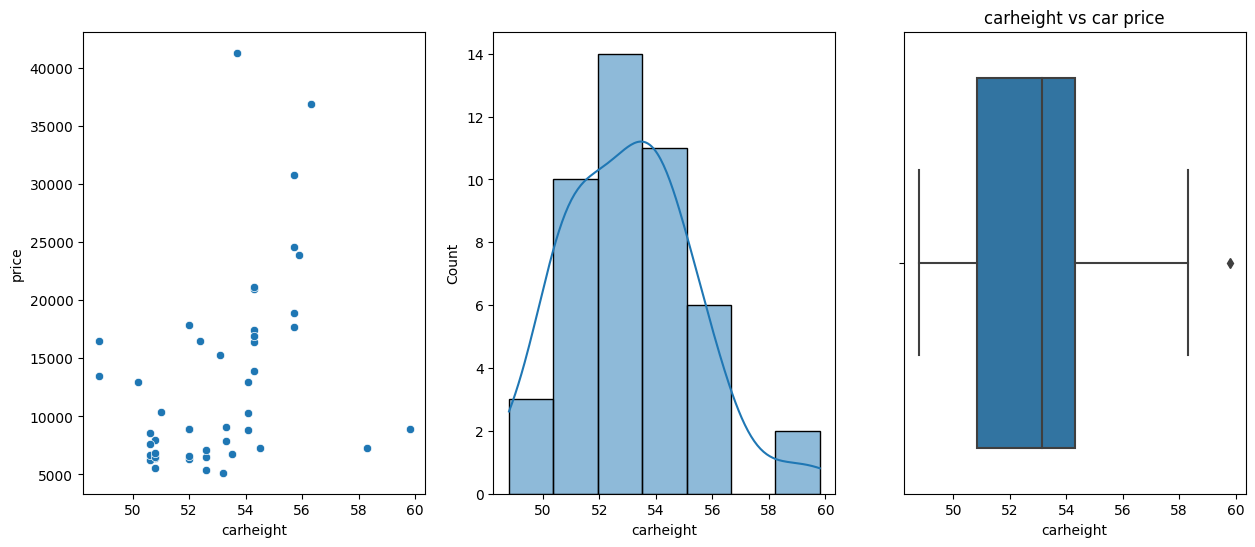

In [8]:
#relation between carheingh and carprice
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(15,6),sharex=True)

sns.scatterplot(data=df,x=df['carheight'],y=df['price'],ax=ax[0])
sns.histplot(data=df,x=df['carheight'],ax=ax[1],kde=True)
sns.boxplot(data=df,x='carheight')
plt.title('carheight vs car price')
plt.show()


In [9]:
#dropping the carheight column
df = df.drop(labels=['carheight'],axis=1)


In [10]:
#understaning the wheelbase data 

df['wheelbase'].median()

97.1

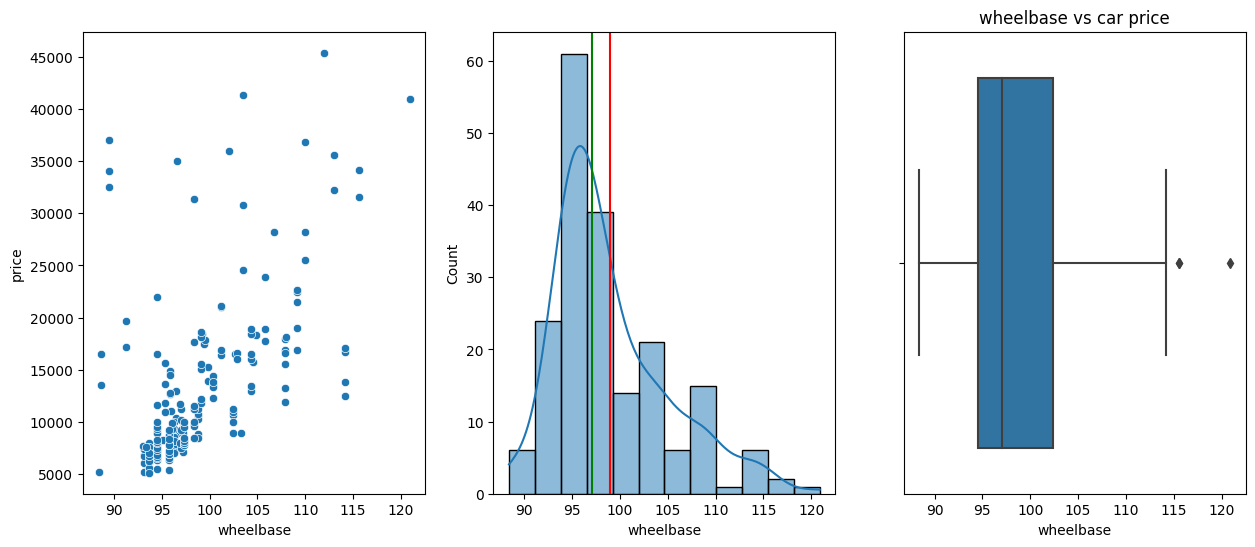

In [11]:
#handling the missing data for column wheelbase 
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(15,6),sharex=True)

sns.scatterplot(data=df,x=df['wheelbase'],y=df['price'],ax=ax[0])
sns.histplot(data=df,x=df['wheelbase'],ax=ax[1],kde=True)
ax[1].axvline(df['wheelbase'].mean(),color='red')
ax[1].axvline(df['wheelbase'].median(),color='green')
sns.boxplot(data=df,x='wheelbase')
plt.title('wheelbase vs car price')
plt.show()


In [12]:
#filling missing values of wheelbase with median value
df['wheelbase']=df['wheelbase'].fillna(df['wheelbase'].median())

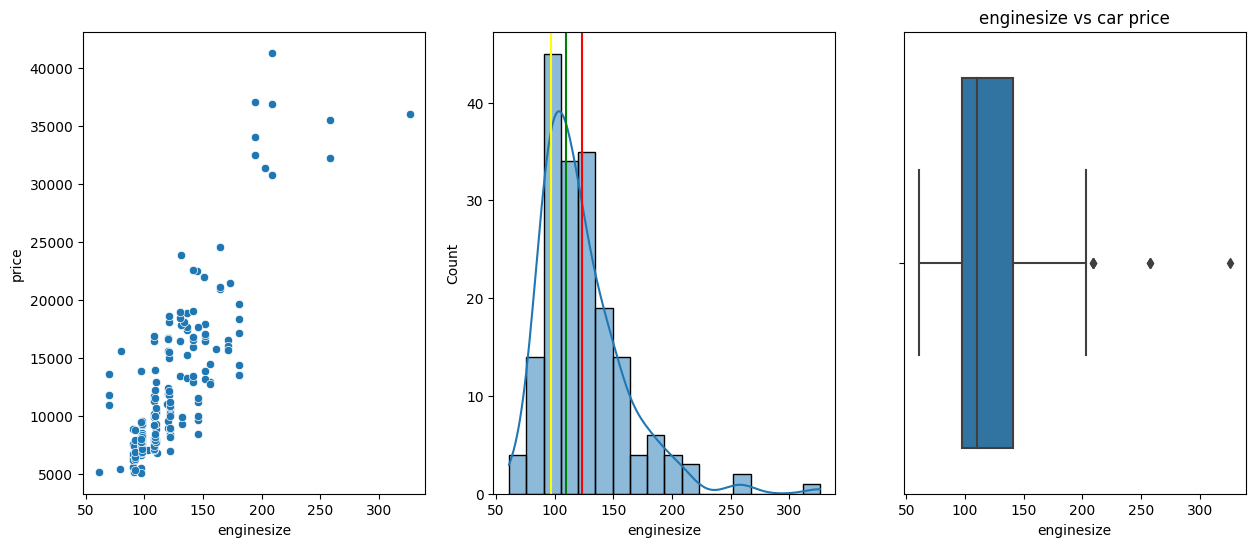

In [13]:
#handling the missing data for column enginesize 
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(15,6),sharex=True)

sns.scatterplot(data=df,x=df['enginesize'],y=df['price'],ax=ax[0])
sns.histplot(data=df,x=df['enginesize'],ax=ax[1],kde=True)
ax[1].axvline(df['enginesize'].mean(),color='red')
ax[1].axvline(df['enginesize'].median(),color='green')
ax[1].axvline(df['enginesize'].mode()[0],color='Yellow')
sns.boxplot(data=df,x='enginesize')
plt.title('enginesize vs car price')
plt.show()


In [14]:
#filling the values of enginesise with mode
df['enginesize']=df['enginesize'].fillna(df['enginesize'].mode()[0])


In [15]:
df['citympg'].describe()

count    197.000000
mean      24.994924
std        6.209356
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

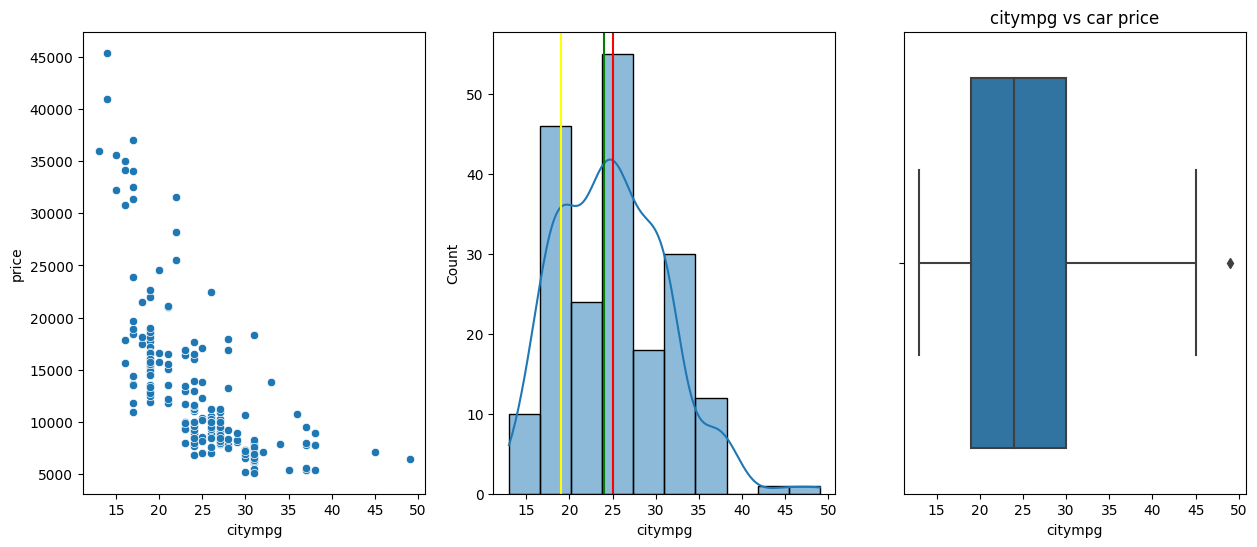

In [16]:
#handling the missing data for column citympg 
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(15,6),sharex=True)

sns.scatterplot(data=df,x=df['citympg'],y=df['price'],ax=ax[0])
sns.histplot(data=df,x=df['citympg'],ax=ax[1],kde=True)
ax[1].axvline(df['citympg'].mean(),color='red')
ax[1].axvline(df['citympg'].median(),color='green')
ax[1].axvline(df['citympg'].mode()[0],color='Yellow')
sns.boxplot(data=df,x='citympg')
plt.title('citympg vs car price')
plt.show()


In [17]:
#filling the citympg values with median

df['citympg']=df['citympg'].fillna(df['citympg'].median())

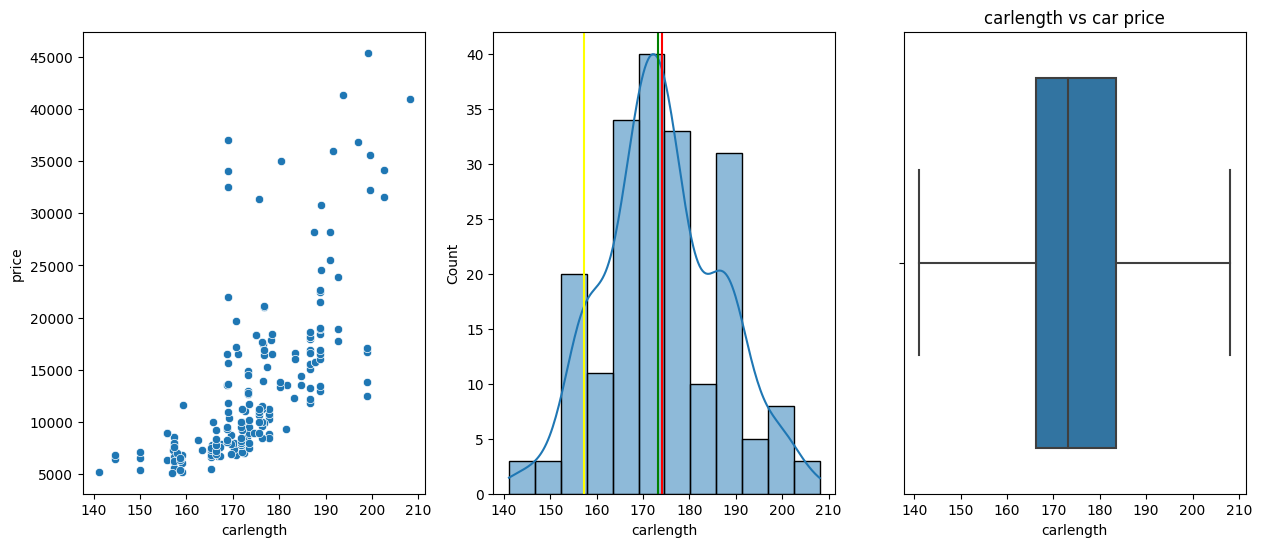

In [18]:
#handling the missing data for column carlength 
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(15,6),sharex=True)

sns.scatterplot(data=df,x=df['carlength'],y=df['price'],ax=ax[0])
sns.histplot(data=df,x=df['carlength'],ax=ax[1],kde=True)
ax[1].axvline(df['carlength'].mean(),color='red')
ax[1].axvline(df['carlength'].median(),color='green')
ax[1].axvline(df['carlength'].mode()[0],color='Yellow')
sns.boxplot(data=df,x='carlength')
plt.title('carlength vs car price')
plt.show()


In [19]:
#filling the value of carlength and carwidth with median

df['carlength']=df['carlength'].fillna(df['carlength'].median())
df['carwidth']=df['carwidth'].fillna(df['carwidth'].median())

### Q3. Check the distribution of target variable 'price'

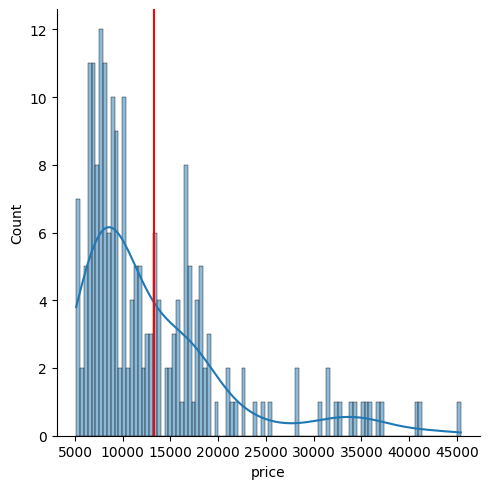

In [20]:
#plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.displot(x=df['price'],bins=100,kde=True)
plt.axvline(df['price'].mean(),color='red')

<Axes: xlabel='price'>

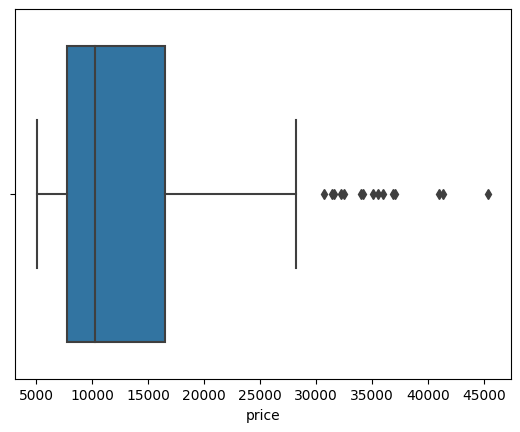

In [21]:
#checking the outliers in target varibale
sns.boxplot(x=df['price'])

### Q4. Find the correlation between horsepower and price

Text(0.5, 1.0, 'horse power and car price has very high positive correlation with 0.8081388225362217')

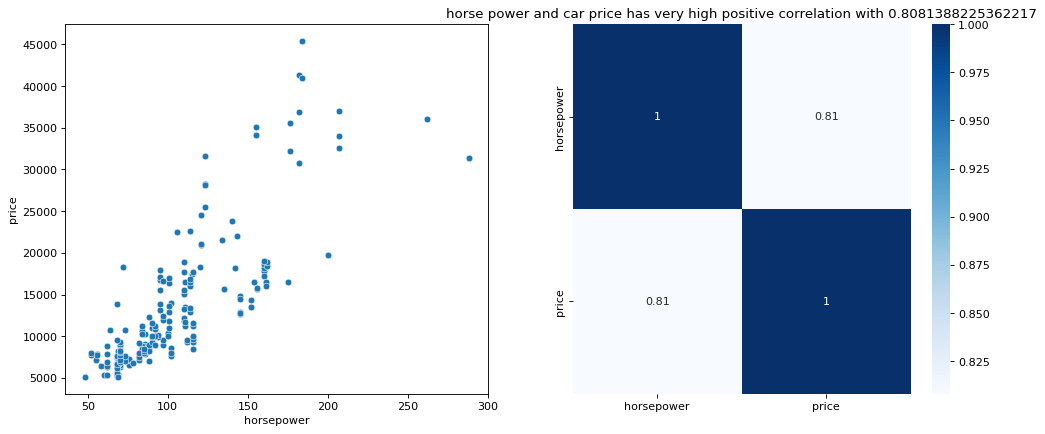

In [22]:
#understainfing the significane of horsepower on price
from scipy.stats import pearsonr
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,6),dpi=80)
sns.heatmap(data=df[['horsepower','price']].corr(),cmap='Blues',annot=True,ax=ax2)
sns.scatterplot(data=df,x='horsepower',y='price',ax=ax1)
corr,p= pearsonr(df['horsepower'],df['price'])

plt.title(f'horse power and car price has very high positive correlation with {corr}')

### Q5. Build a linear regression model to predict the price of car

In [23]:
num_col= df.select_dtypes(include=np.number).columns #numerical columns in dataset
 
num_col

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

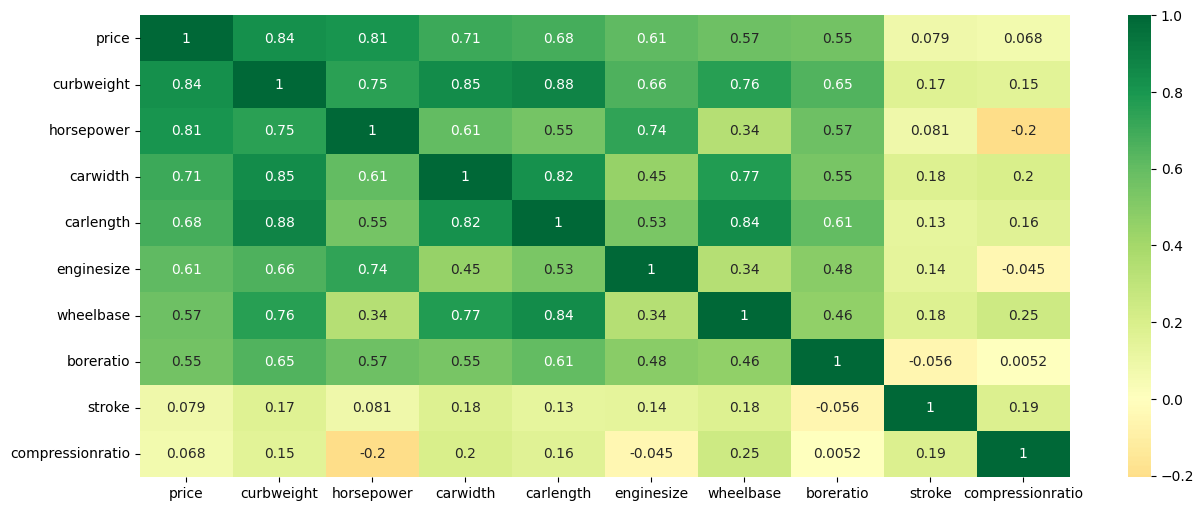

In [24]:
#carprice correlation matrix ( for significance of numerical column)
k=10
num_col_significant=df[num_col].corr().nlargest(k,'price')['price'].index
plt.figure(figsize=(15,6))
p=sns.heatmap(df[num_col_significant].corr(),annot=True,cmap='RdYlGn',center=0)

In [25]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114,5400,23.0,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160,5300,19.0,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134,5500,18.0,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106,4800,26.0,27,22470.0


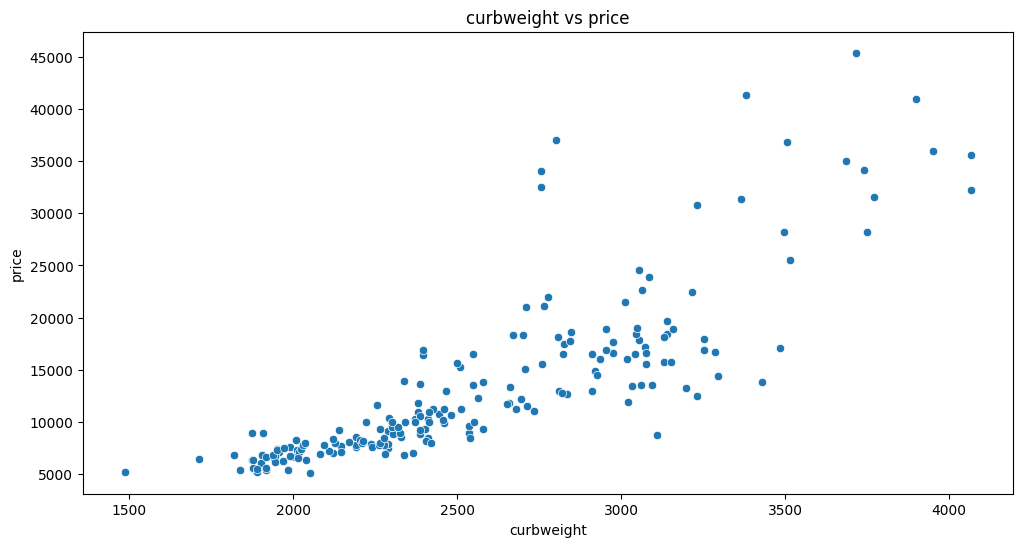

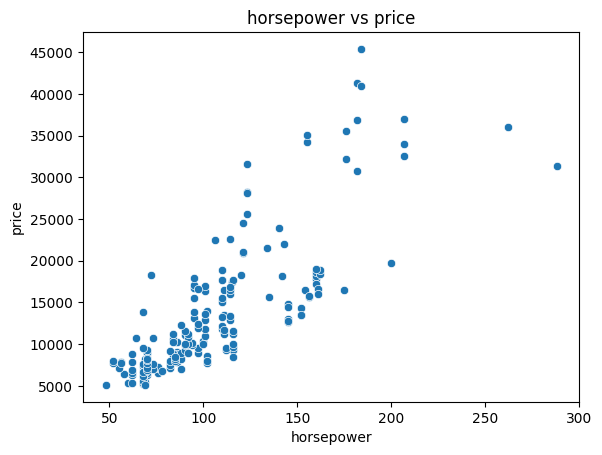

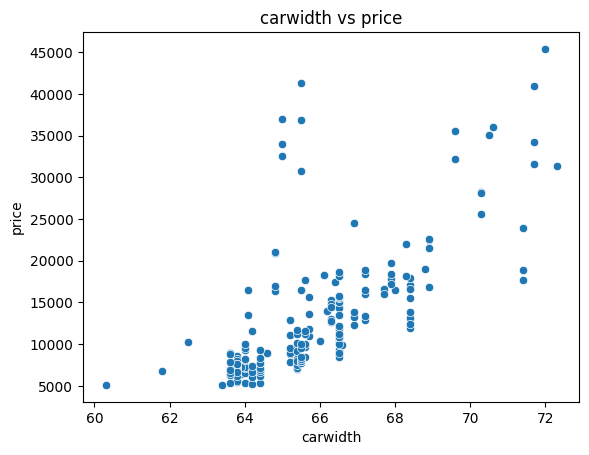

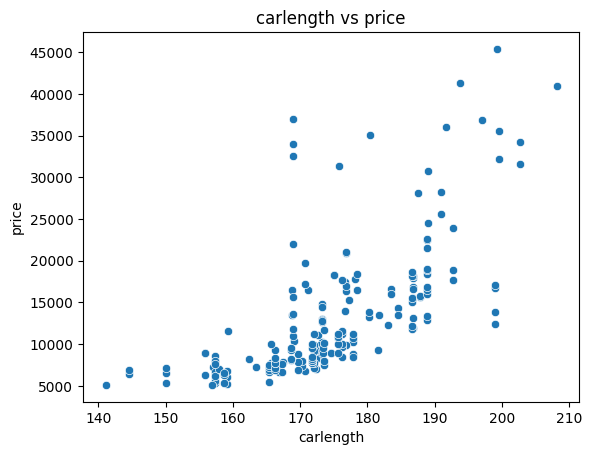

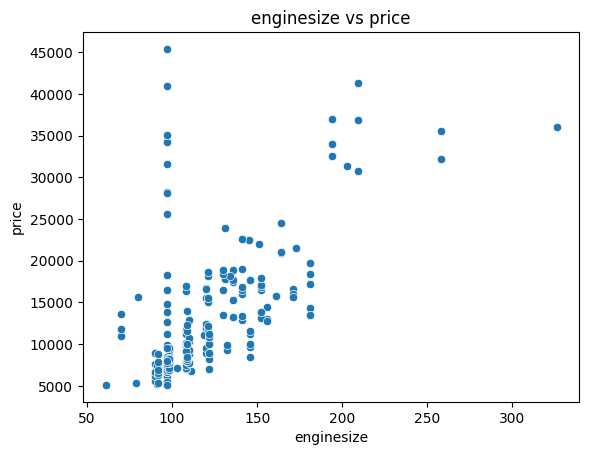

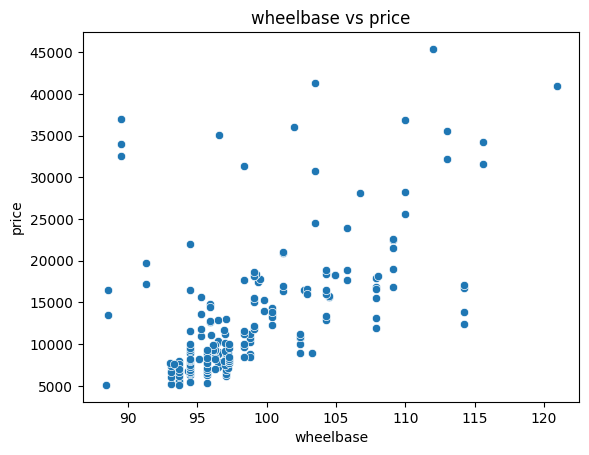

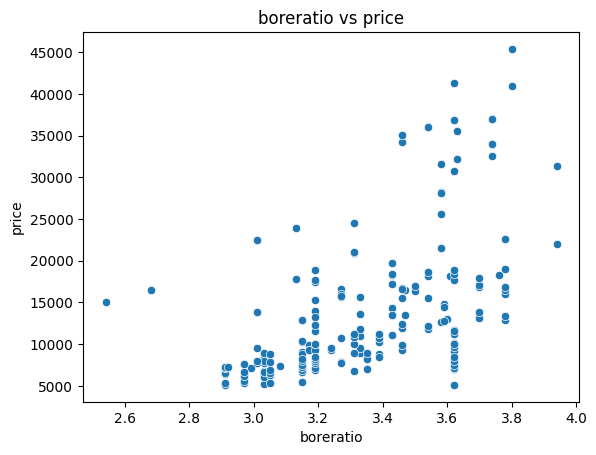

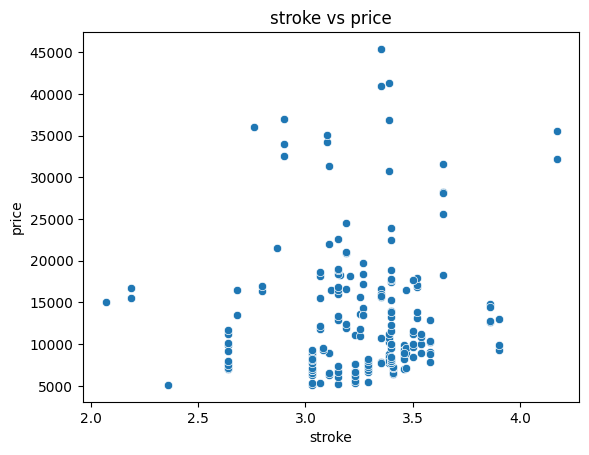

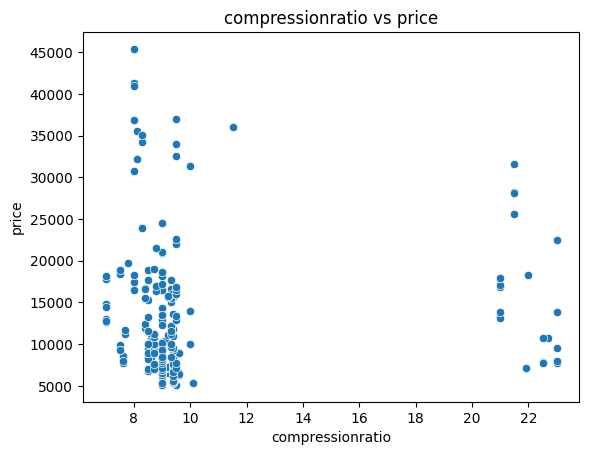

In [26]:
#visualizing the top 10 numerical column relation 
def scatterplot(x="curbweight",y="price"):
    sns.scatterplot(data=df,x=df[x],y=df[y])
    plt.title(x + " vs " + y)
    plt.show()

plt.figure(figsize=(12,6))

for col in num_col_significant[1:]:
    scatterplot(x=col,y='price')

highwaympg         -0.697599
citympg            -0.639628
car_ID             -0.109093
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
boreratio           0.553173
wheelbase           0.573244
enginesize          0.610864
carlength           0.683082
carwidth            0.707942
horsepower          0.808139
curbweight          0.835305
price               1.000000
Name: price, dtype: float64


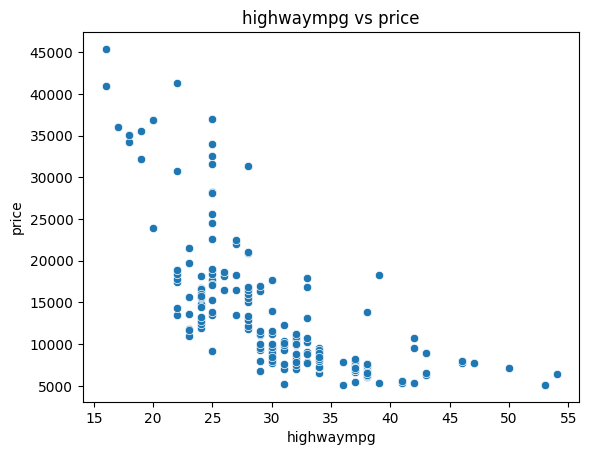

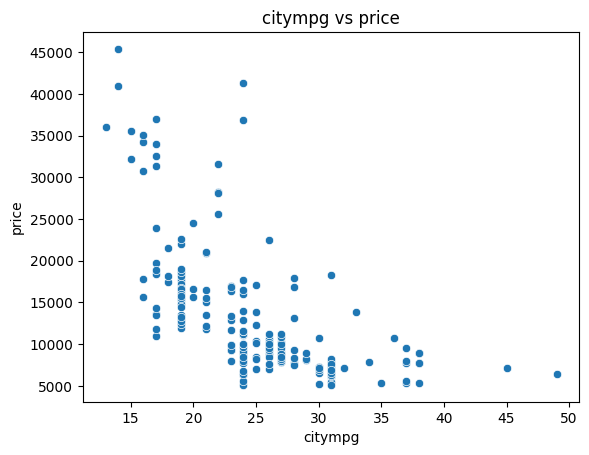

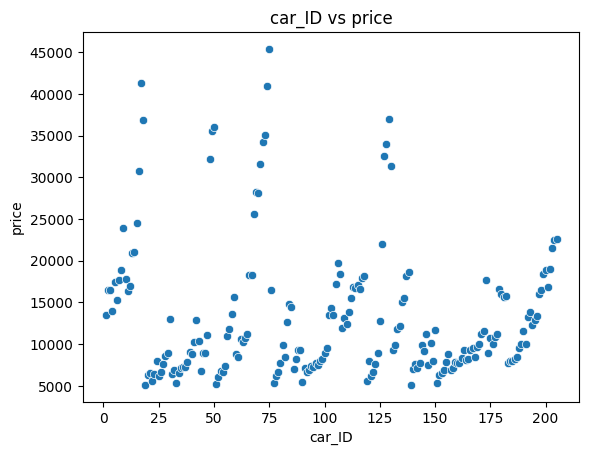

In [27]:
#lets look at negative correlated numericla columns
corr=df[num_col].corr()
print(corr['price'].sort_values())
#only 2 features have strong -ive correleation with price
for col in corr['price'].sort_values()[0:3].index:
    scatterplot(x=col,y='price')

In [28]:
#checking the statistical significance of categorical variable using anova test
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols 

significant_cat_col=[]

alpha=0.05
for col in cat_col:
    model=ols('price ~C('+ col +')',data=df).fit()
    print(f' anova  model stats are p-value for {col} is {model.f_pvalue:.3f}')
    res=sm.stats.anova_lm(model,type=2)
    #print(model.f_pvalue)
    if model.f_pvalue <alpha:
        significant_cat_col.append(col)

significant_cat_col

    




 anova  model stats are p-value for CarName is 0.000
 anova  model stats are p-value for fueltype is 0.132
 anova  model stats are p-value for aspiration is 0.011
 anova  model stats are p-value for doornumber is 0.650
 anova  model stats are p-value for carbody is 0.000
 anova  model stats are p-value for drivewheel is 0.000
 anova  model stats are p-value for enginelocation is 0.000
 anova  model stats are p-value for enginetype is 0.000
 anova  model stats are p-value for cylindernumber is 0.000
 anova  model stats are p-value for fuelsystem is 0.000


['CarName',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

inference- all the the categorical columns except doornumber are statistically significant 



# checking the outliers

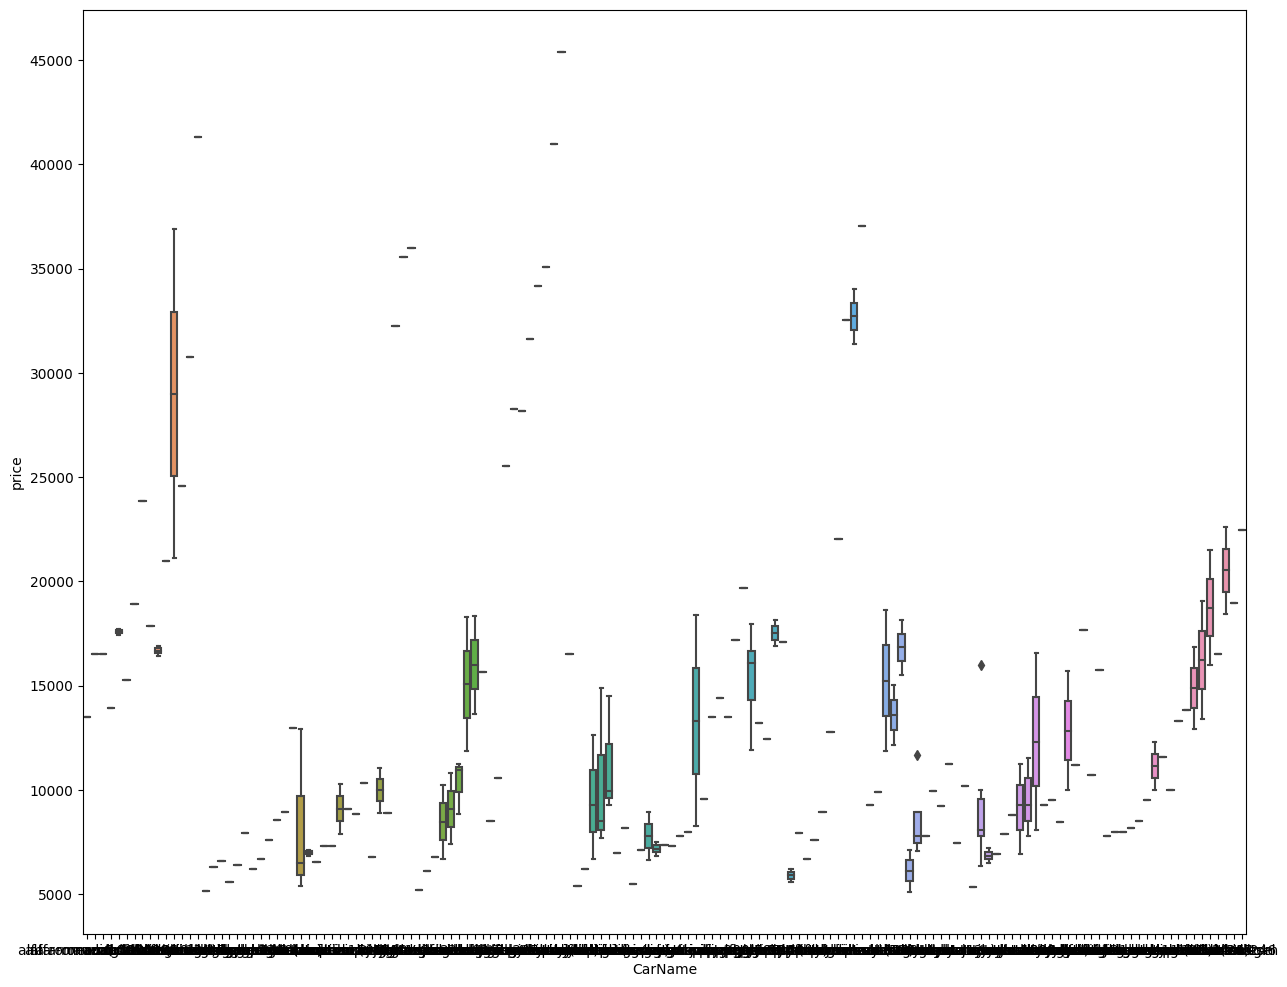

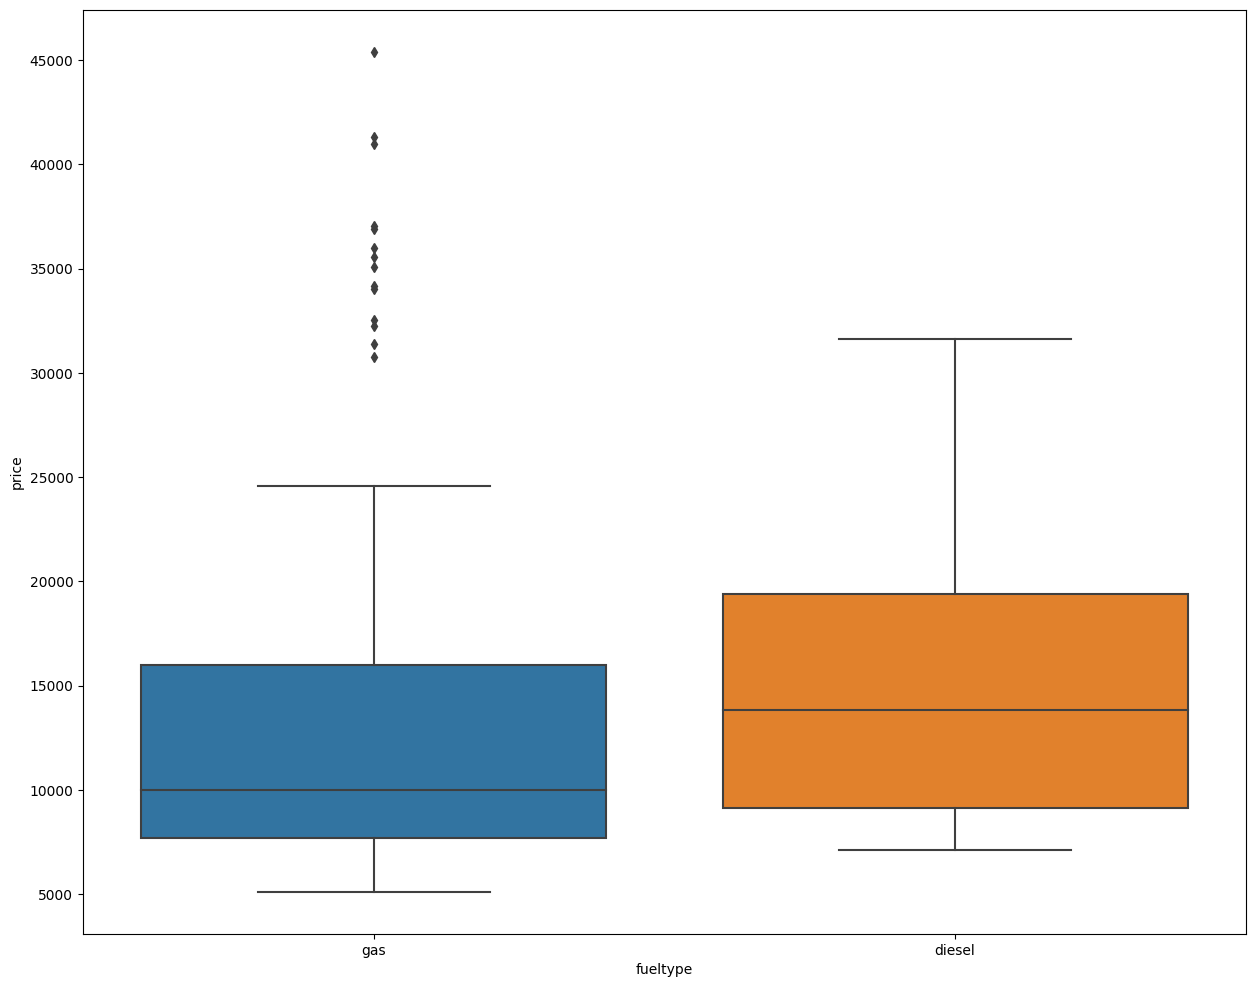

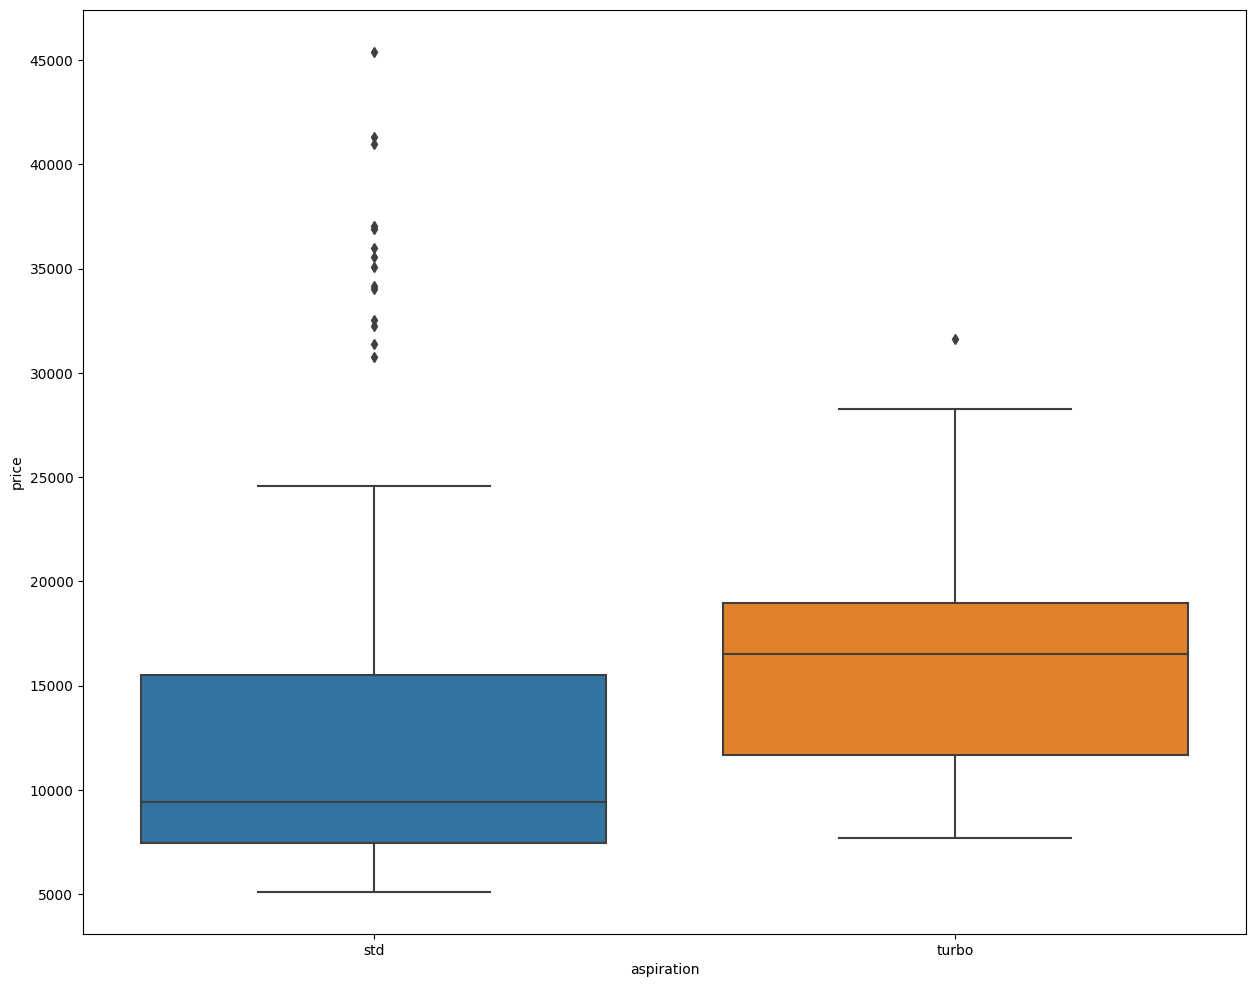

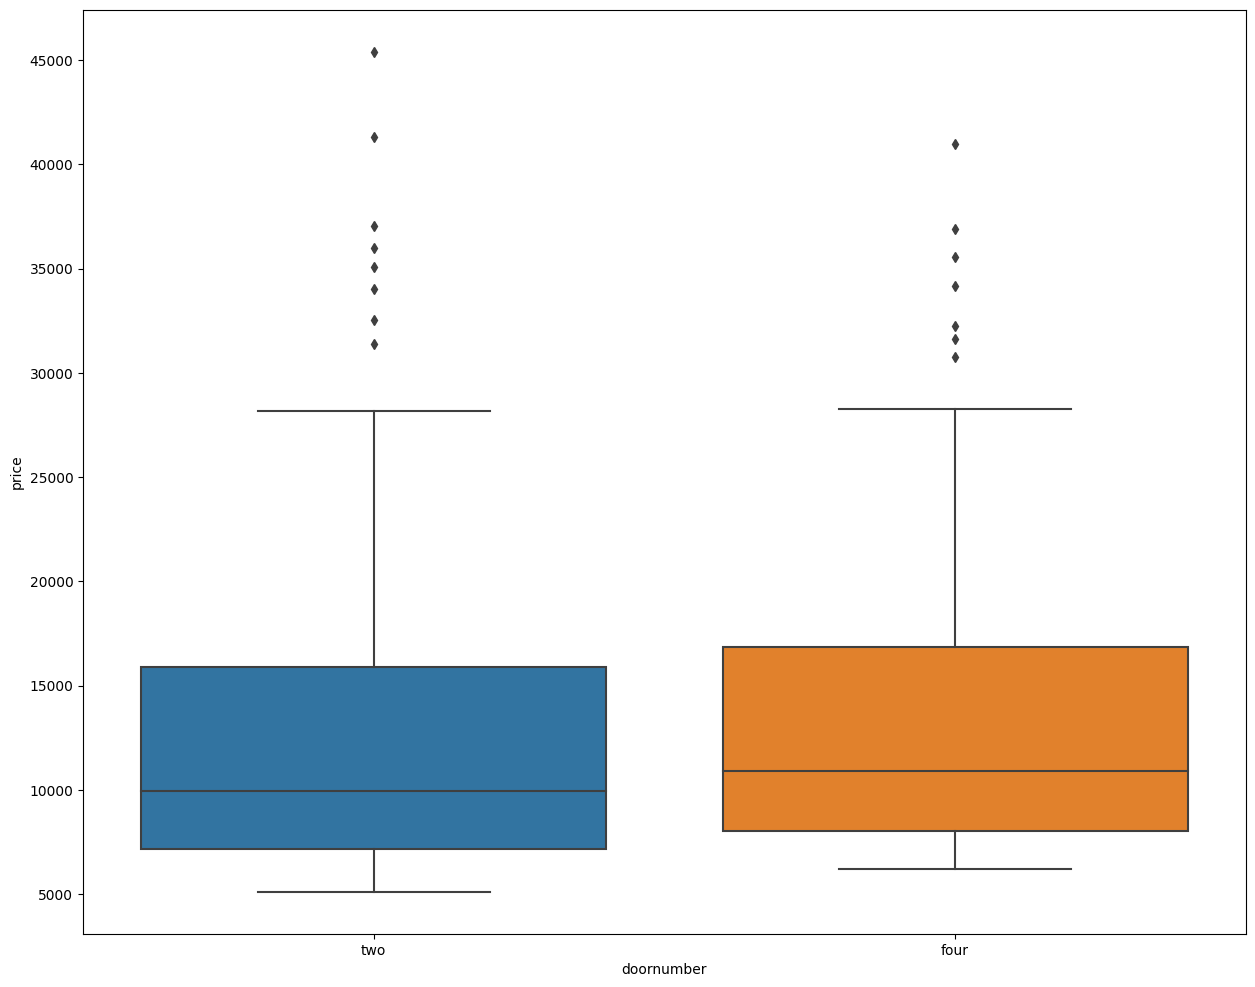

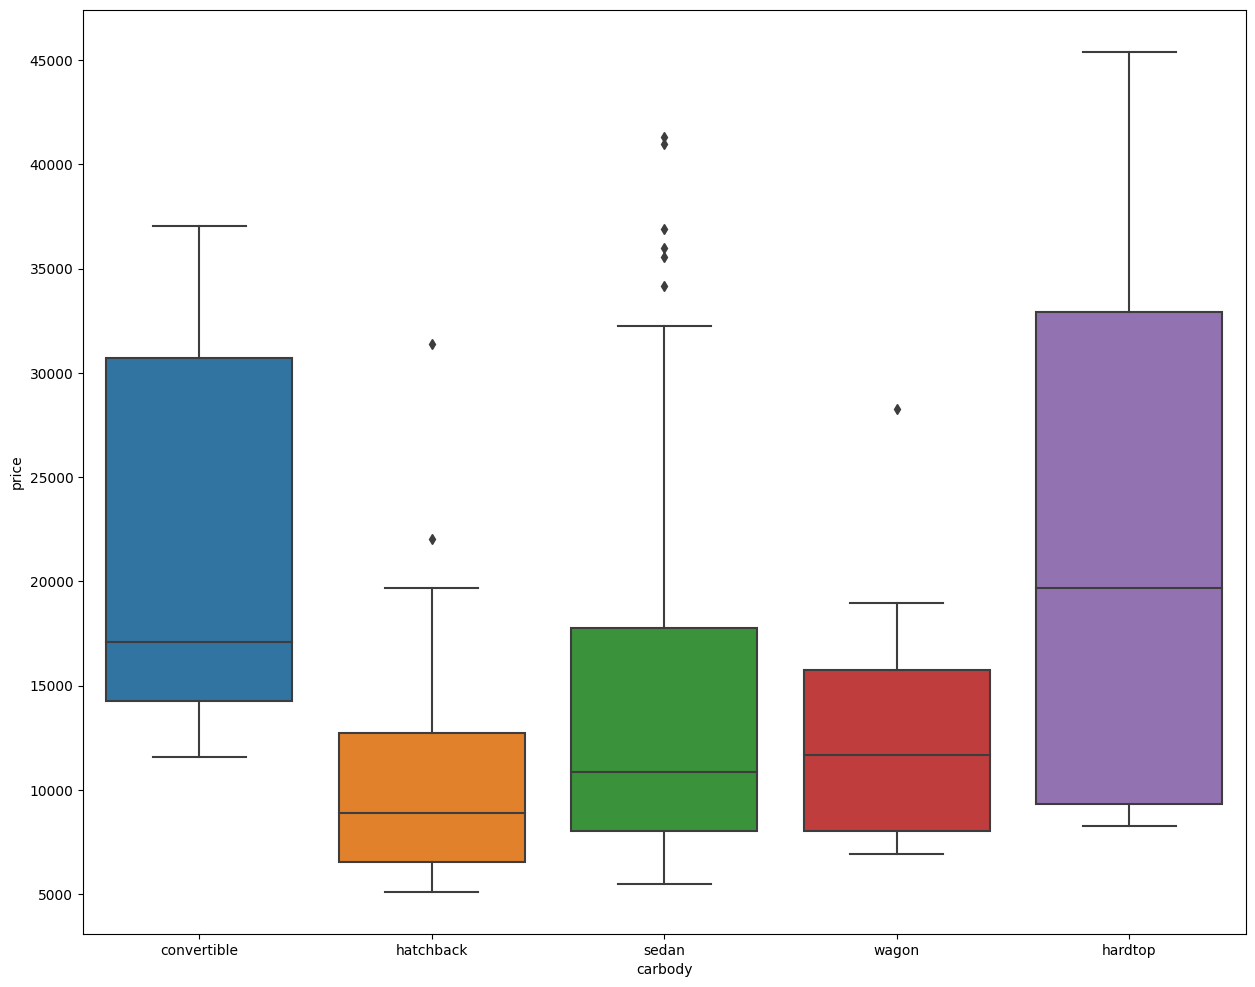

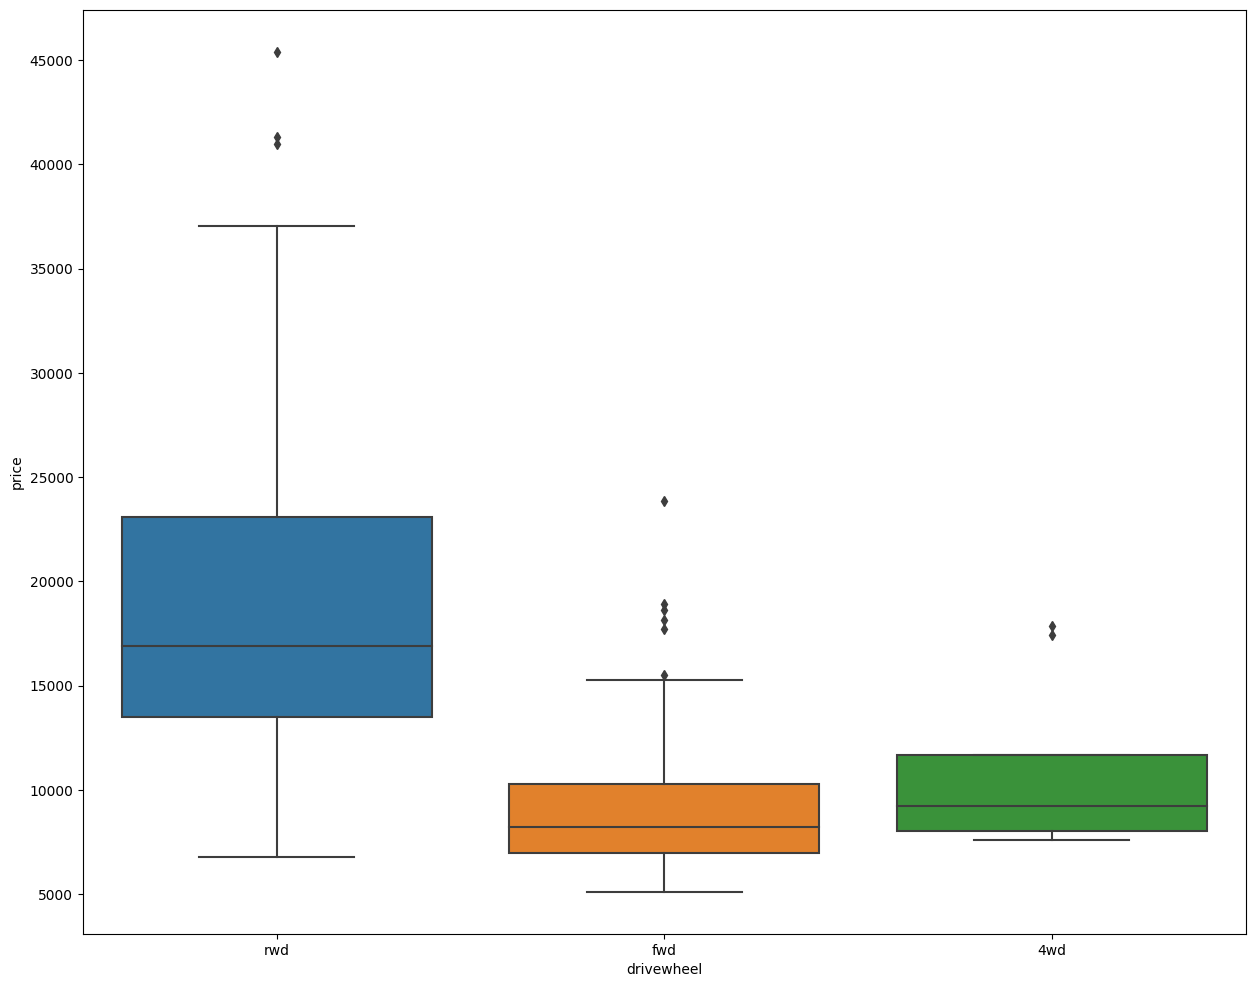

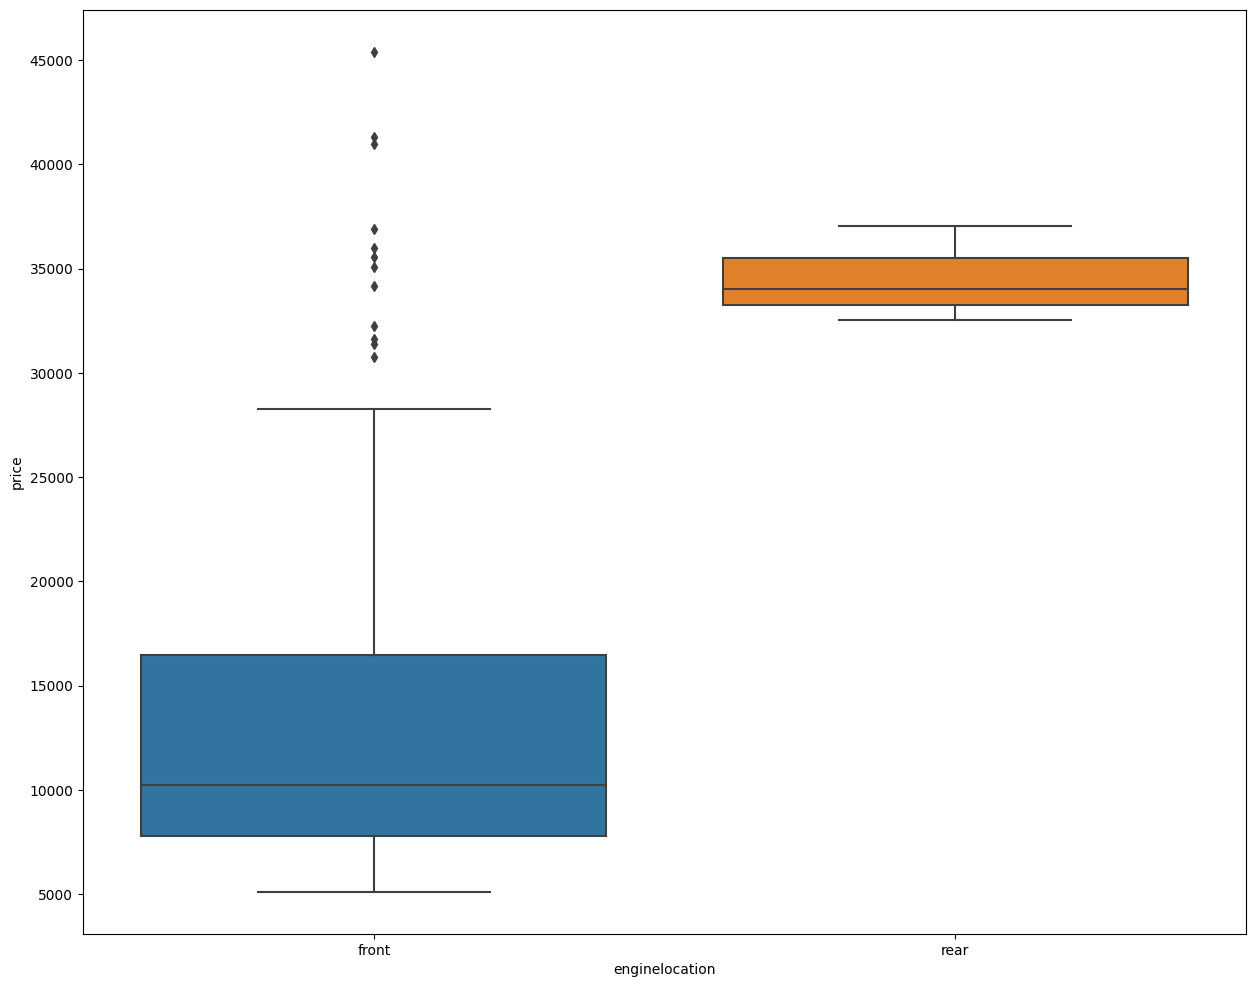

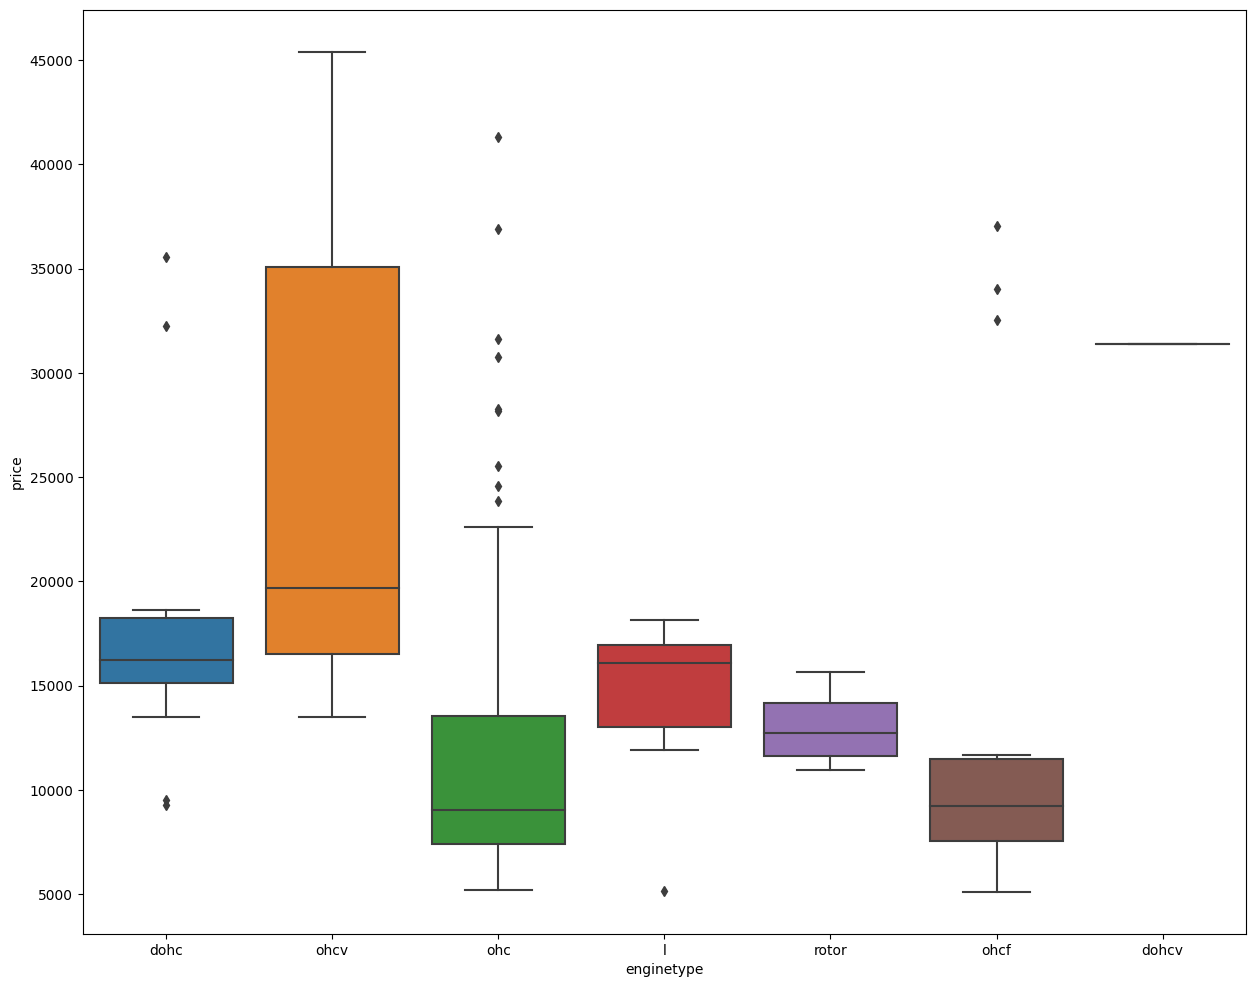

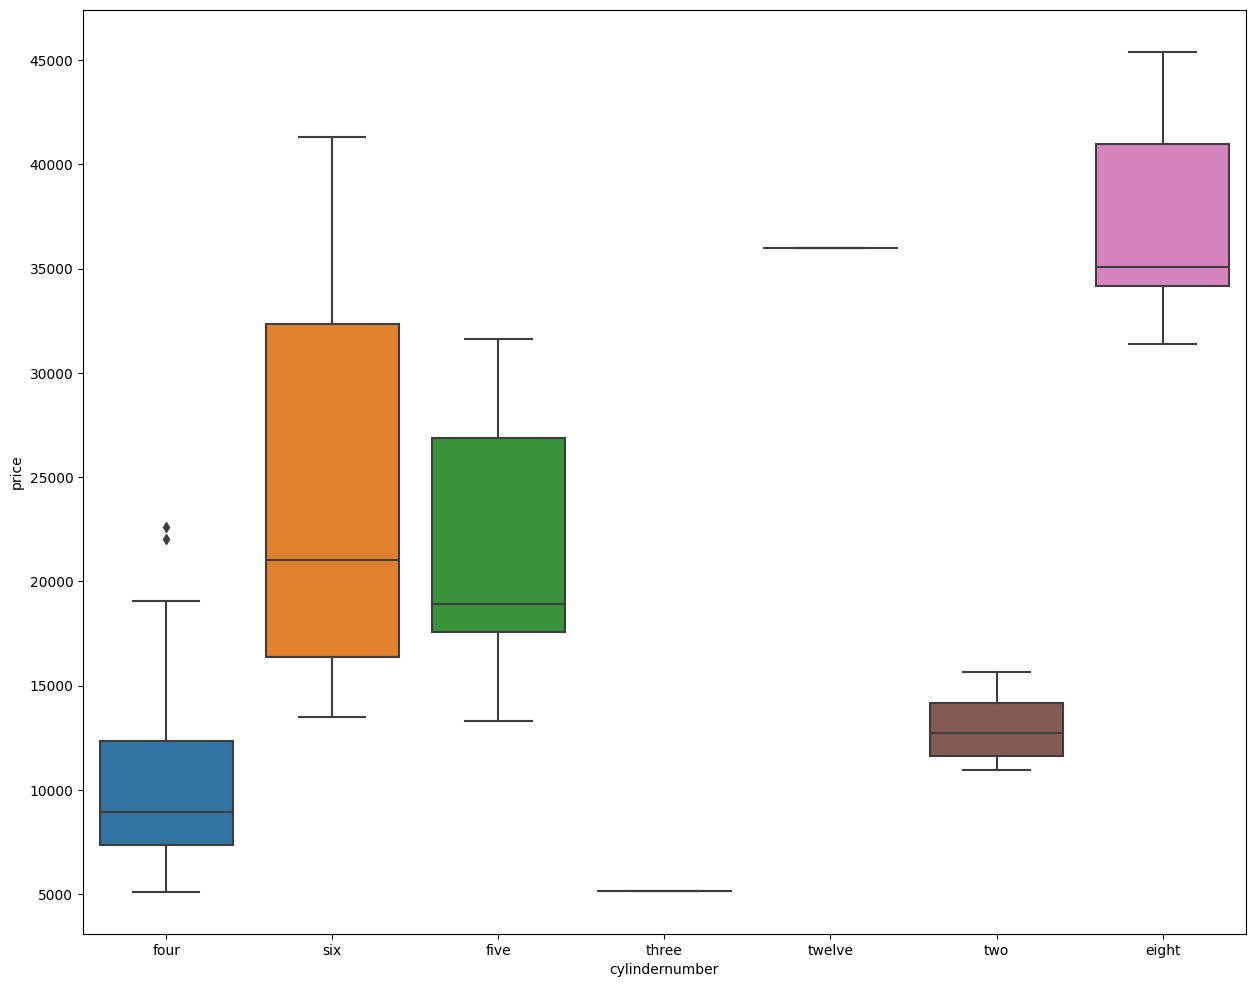

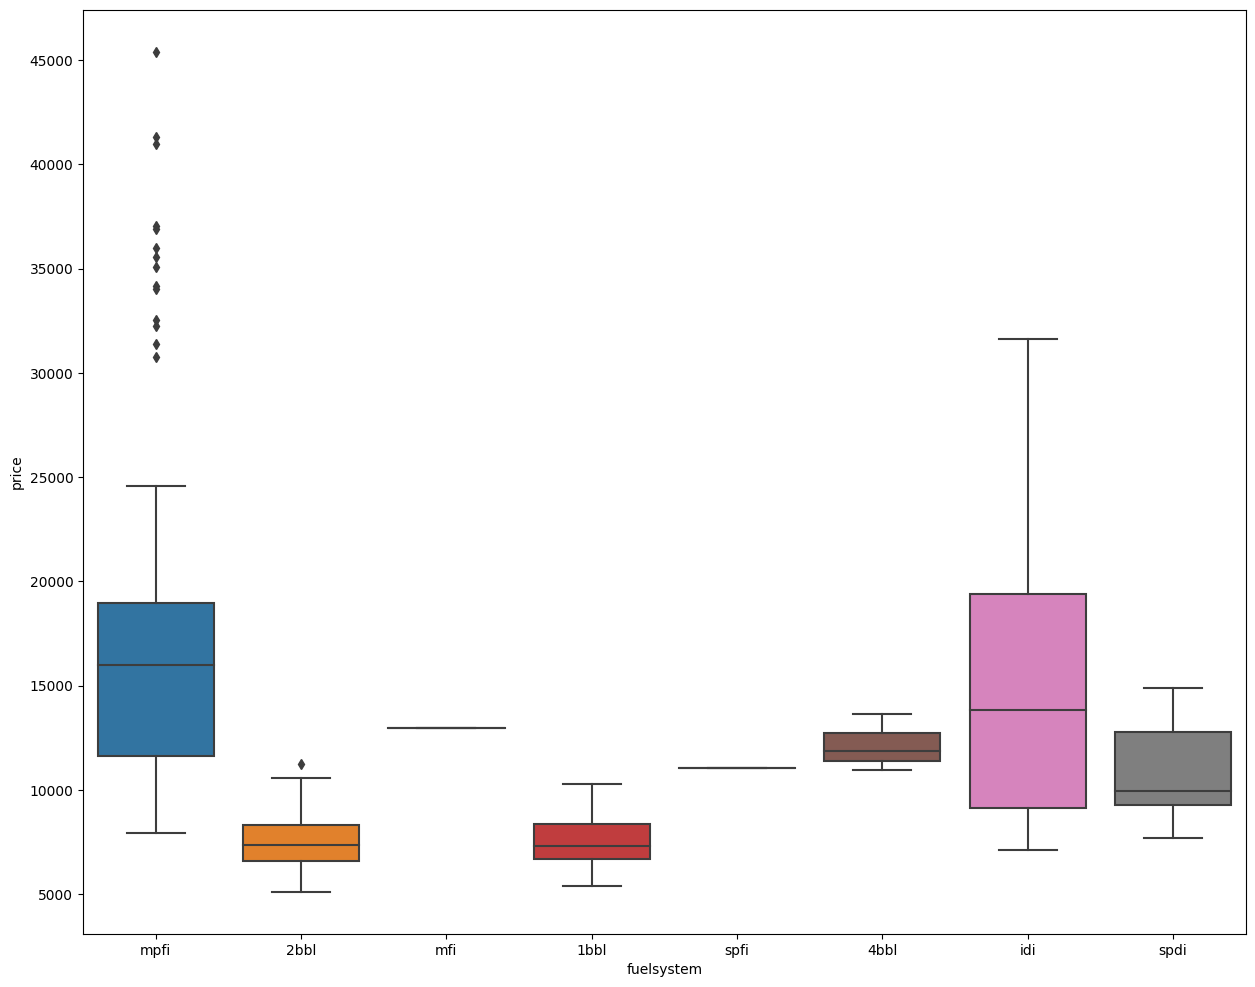

In [29]:
#visualizing the outliers for categorical columns

for col in cat_col:
    plt.figure(figsize=(15,12),dpi=100)
    sns.boxplot(data=df,x=col,y='price')
    plt.show()
    

<Axes: >

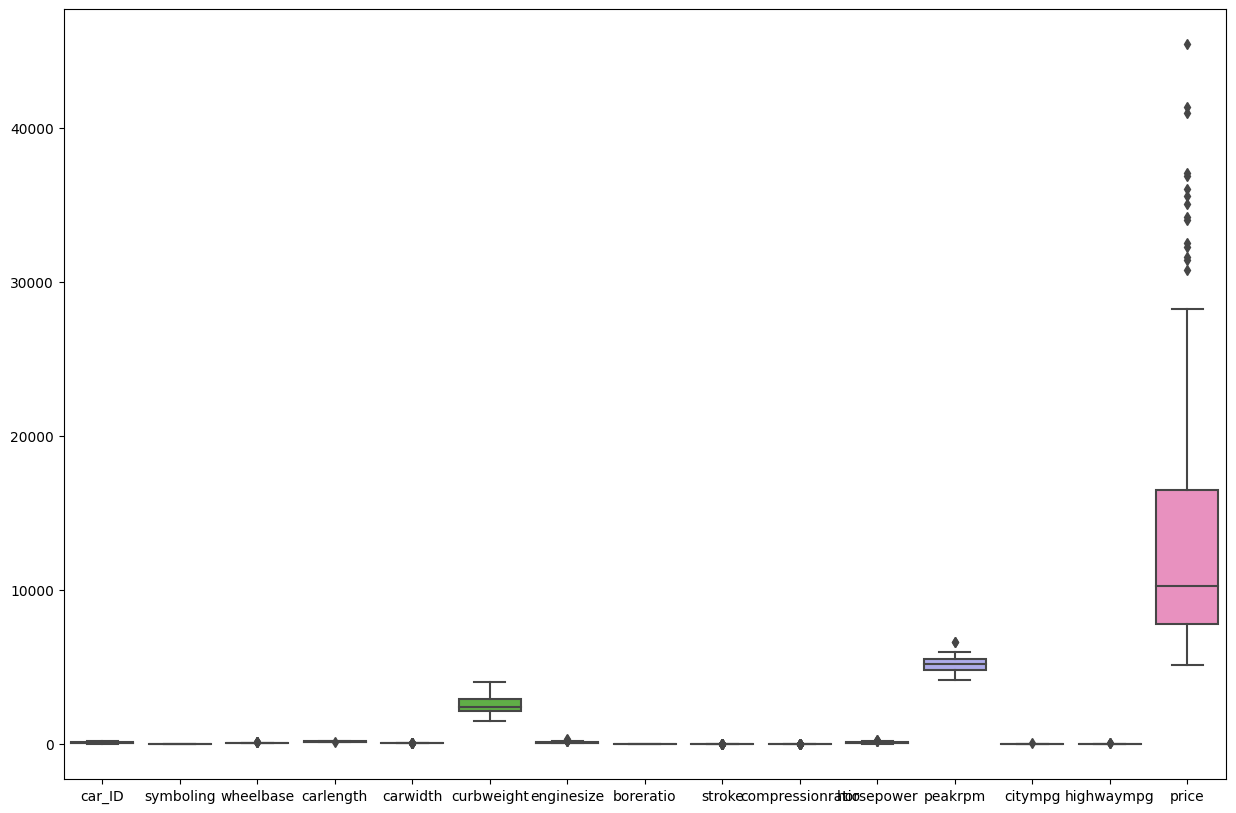

In [30]:
#visualizing the outliers for numerical columns

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df)

In [31]:
#mathmatically checking the outliers in target variable using z-score

df['price_stanardized'] =(df['price']-df['price'].mean())/df['price'].std() #formula for z-score

print('there are 3 rows having outlier in target variable')
df[(df['price'] > 3) | (df['price'] < -3)]

there are 3 rows having outlier in target variable


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_stanardized
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21.0,27,13495.0,0.027324
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21.0,27,16500.0,0.403473
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19.0,26,16500.0,0.403473
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24.0,30,13950.0,0.084279
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18.0,22,17450.0,0.522389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23.0,28,16845.0,0.446659
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19.0,25,19045.0,0.722042
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18.0,23,21485.0,1.027468
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26.0,27,22470.0,1.150765


lets create the model with outliers and check the p value

### feature encoding

In [32]:
#understanding the value counts of categorical columns
df_encoded=df.copy()
for col in cat_col:
    print(df[col].value_counts(),'\n')

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64 

gas       185
diesel     20
Name: fueltype, dtype: int64 

std      168
turbo     37
Name: aspiration, dtype: int64 

four    115
two      90
Name: doornumber, dtype: int64 

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64 

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64 

front    202
rear       3
Name: enginelocation, dtype: int64 

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64 

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dty

In [33]:
df['CarName'].nunique() #carname variable has 147 unique categories so lets use target encoding with smoothing
df['fuelsystem'].nunique() #fuelsystem variable has 8 unique categories, with some wieght of 1 so lets use target encoding
df['cylindernumber'] #we will use target encoding for cyclindernumber as well 
df['enginetype'] #we will use target encoding for enginetype as well 

#and for rest all we will use one hot ending to encode categorical values


0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: enginetype, Length: 205, dtype: object

In [34]:
#feature encoding using target encoding with smoothing-cutomize functon 

import category_encoders    
from category_encoders import TargetEncoder

def calulate_smooth_Targetmean(df,feature,target,m):
    #mathmatical equation for target encoding using smoothing is:- ((n*x_bar) + (m*w))/(n+m)
    #where n = no of values we have  ,w=overall mean , m = any noise value 
    
    #calculate the overall mean 'w'(target mean)
    w = df[target].mean()
    
    #calculate the number of observation(counts) and mean for each group in category varibale
    agg= df.groupby(feature)[target].agg(['count','mean'])
    n=agg['count']
    x_bar= agg['mean']
    
    #compute the smooth mean
    smooth_mean= ((n*x_bar) + (m*w))/(n+m)
    print(smooth_mean)
    #return df[feature].map(smooth_mean)
    
    


In [35]:
#lets check the smooth mean of feature carName
df_test= pd.DataFrame({'feature column' : df['fueltype'], 'encoded_mean':calulate_smooth_Targetmean(df,feature='fueltype',target='price',m=10)})


fueltype
diesel    14984.336857
gas       13013.998834
dtype: float64


In [36]:
#performing the above python functionality using libraries available under sklearn
import warnings
warnings.filterwarnings("ignore")

from category_encoders import MEstimateEncoder

for col in cat_col:
    
    encoder= MEstimateEncoder(cols=[col],m=10)
    encoded_feature_name = 'encoded_' + col
    print(encoded_feature_name)
    #encoded_feature_name=encoder.fit_transform(df_encoded[col],df_encoded['price'])
    #df_encoded=pd.concat([df_encoded,encoded_feature_name],axis=1)

    df_encoded[encoded_feature_name]=encoder.fit_transform(df_encoded[col],df_encoded['price'])



encoded_CarName
encoded_fueltype
encoded_aspiration
encoded_doornumber
encoded_carbody
encoded_drivewheel
encoded_enginelocation
encoded_enginetype
encoded_cylindernumber
encoded_fuelsystem


In [37]:
df_encoded.drop(columns=cat_col,inplace=True)

df_encoded

,car_ID,symboling,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,compressionratio,...,encoded_CarName,encoded_fueltype,encoded_aspiration,encoded_doornumber,encoded_carbody,encoded_drivewheel,encoded_enginelocation,encoded_enginetype,encoded_cylindernumber,encoded_fuelsystem
0,1,3,88.6,168.8,64.1,2548,130.0,3.47,2.68,9.0,...,13296.555064,13013.998834,12648.655088,13018.602727,16506.881607,19139.402392,12975.984777,15916.550259,10462.734353,17324.036276
1,2,3,88.6,168.8,64.1,2548,130.0,3.47,2.68,9.0,...,13569.736882,13013.998834,12648.655088,13018.602727,16506.881607,19139.402392,12975.984777,15916.550259,10462.734353,17324.036276
2,3,1,94.5,171.2,65.5,2823,152.0,2.68,3.47,9.0,...,13569.736882,13013.998834,12648.655088,13018.602727,10739.159659,19139.402392,12975.984777,19958.526335,20614.444286,17324.036276
3,4,2,99.8,176.6,66.2,2337,109.0,3.19,3.40,10.0,...,13337.918701,13013.998834,12648.655088,13483.196846,14243.557601,9549.877736,12975.984777,11681.811853,10462.734353,17324.036276
4,5,2,99.4,176.6,66.4,2824,136.0,3.19,3.40,8.0,...,13993.925476,13013.998834,12648.655088,13483.196846,14243.557601,12239.698564,12975.984777,11681.811853,17652.489177,17324.036276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,2952,141.0,3.78,3.15,9.5,...,13546.008809,13013.998834,12648.655088,13483.196846,14243.557601,19139.402392,12975.984777,11681.811853,10462.734353,17324.036276
201,202,-1,109.1,188.8,68.8,3049,141.0,3.78,3.15,8.7,...,13768.925476,13013.998834,15655.303675,13483.196846,14243.557601,19139.402392,12975.984777,11681.811853,10462.734353,17324.036276
202,203,-1,109.1,188.8,68.9,3012,173.0,3.58,2.87,8.8,...,14186.425476,13013.998834,12648.655088,13483.196846,14243.557601,19139.402392,12975.984777,19958.526335,20614.444286,17324.036276
203,204,-1,109.1,188.8,68.9,3217,145.0,3.01,3.40,23.0,...,14112.464155,14984.336857,15655.303675,13483.196846,14243.557601,19139.402392,12975.984777,11681.811853,20614.444286,14984.336857


In [38]:
#model fitting using entire datset
df_entiremodel=df_encoded
X_data=sm.add_constant(df_entiremodel).drop(columns=['price','price_stanardized'])


Y_data=df_encoded['price']

In [39]:
X_data

,const,car_ID,symboling,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,...,encoded_CarName,encoded_fueltype,encoded_aspiration,encoded_doornumber,encoded_carbody,encoded_drivewheel,encoded_enginelocation,encoded_enginetype,encoded_cylindernumber,encoded_fuelsystem
0,1.0,1,3,88.6,168.8,64.1,2548,130.0,3.47,2.68,...,13296.555064,13013.998834,12648.655088,13018.602727,16506.881607,19139.402392,12975.984777,15916.550259,10462.734353,17324.036276
1,1.0,2,3,88.6,168.8,64.1,2548,130.0,3.47,2.68,...,13569.736882,13013.998834,12648.655088,13018.602727,16506.881607,19139.402392,12975.984777,15916.550259,10462.734353,17324.036276
2,1.0,3,1,94.5,171.2,65.5,2823,152.0,2.68,3.47,...,13569.736882,13013.998834,12648.655088,13018.602727,10739.159659,19139.402392,12975.984777,19958.526335,20614.444286,17324.036276
3,1.0,4,2,99.8,176.6,66.2,2337,109.0,3.19,3.40,...,13337.918701,13013.998834,12648.655088,13483.196846,14243.557601,9549.877736,12975.984777,11681.811853,10462.734353,17324.036276
4,1.0,5,2,99.4,176.6,66.4,2824,136.0,3.19,3.40,...,13993.925476,13013.998834,12648.655088,13483.196846,14243.557601,12239.698564,12975.984777,11681.811853,17652.489177,17324.036276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,201,-1,109.1,188.8,68.9,2952,141.0,3.78,3.15,...,13546.008809,13013.998834,12648.655088,13483.196846,14243.557601,19139.402392,12975.984777,11681.811853,10462.734353,17324.036276
201,1.0,202,-1,109.1,188.8,68.8,3049,141.0,3.78,3.15,...,13768.925476,13013.998834,15655.303675,13483.196846,14243.557601,19139.402392,12975.984777,11681.811853,10462.734353,17324.036276
202,1.0,203,-1,109.1,188.8,68.9,3012,173.0,3.58,2.87,...,14186.425476,13013.998834,12648.655088,13483.196846,14243.557601,19139.402392,12975.984777,19958.526335,20614.444286,17324.036276
203,1.0,204,-1,109.1,188.8,68.9,3217,145.0,3.01,3.40,...,14112.464155,14984.336857,15655.303675,13483.196846,14243.557601,19139.402392,12975.984777,11681.811853,20614.444286,14984.336857


In [40]:
model=sm.OLS(Y_data,X_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     95.70
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           2.33e-89
Time:                        00:18:37   Log-Likelihood:                -1863.7
No. Observations:                 205   AIC:                             3777.
Df Residuals:                     180   BIC:                             3861.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -7717

## removing outliers from target variable using Z score


In [41]:
df_encoded['Zscore_price']=(df_encoded['price']-df_encoded['price'].mean())/df_encoded['price'].std()
df_encoded[(df_encoded['Zscore_price']>3) |(df_encoded['Zscore_price'] <-3)].index


Int64Index([16, 73, 74], dtype='int64')

In [42]:
#dropping the values having z score more than 3 or less than -3
df_encoded.drop(df_encoded[(df_encoded['Zscore_price']>3) |(df_encoded['Zscore_price'] <-3)].index,inplace=True)

In [43]:
#droppings the feature which are non significant basis on pearson corr and ANOVA
df_encoded.drop(columns=['encoded_doornumber','car_ID','symboling','boreratio','peakrpm','citympg','highwaympg'],axis=1,inplace=True)

###  building linear model on above features

In [44]:
X_data=df_encoded.drop(columns=['price','price_stanardized'],axis=1)
Y_data=df_encoded['price']

In [45]:
X_data=X_data.drop(columns='carlength',axis=1) 
#remove feature one by one basis on p-value ,removed(encoded_drivewheel,stroke,compressionratio,encoded_fuelsystem,carwidth,encoded_aspiration)

In [46]:
#X_data=sm.add_constant(X_data)
model_s=sm.OLS(Y_data,X_data).fit()
print(model_s.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.988e+05
Date:                Wed, 20 Sep 2023   Prob (F-statistic):                        0.00
Time:                        00:18:37   Log-Likelihood:                         -1141.1
No. Observations:                 202   AIC:                                      2316.
Df Residuals:                     185   BIC:                                      2372.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [47]:
#finding the vif  in the model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=X_data.columns
vif['vif']=[variance_inflation_factor(X_data,i) for i in range(X_data.shape[1])]
vif['vif']=round(vif['vif'],2)
vif


,features,vif
0,wheelbase,1412.03
1,carwidth,4406.59
2,curbweight,287.22
3,enginesize,47.45
4,stroke,163.77
5,compressionratio,97.26
6,horsepower,86.87
7,encoded_CarName,1020.83
8,encoded_fueltype,7854.72
9,encoded_aspiration,308.49


### Q6. Evaluate the model extensively

In [48]:
#evaluating the model using trian test split
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_encoded=df_encoded.drop(columns=['price_stanardized','Zscore_price'])
X=df_encoded.drop(columns='price',axis=1)
y=df_encoded['price']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)
X_train=sm.add_constant(X_train)

In [50]:
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     114.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           7.43e-67
Time:                        00:18:38   Log-Likelihood:                -1257.1
No. Observations:                 141   AIC:                             2550.
Df Residuals:                     123   BIC:                             2603.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -7.82

In [51]:
#deteticting outliers usings cooks distance
np.set_printoptions(suppress=True)

#create instance of influence
influence=model.get_influence()

#obtain cooks distance for each observation
cooks= influence.cooks_distance

print(np.mean(cooks[0]))


0.015382635806154118


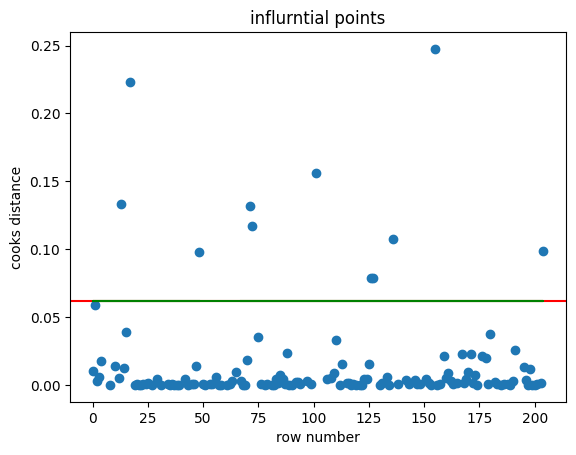

In [52]:
#draw plot for cooks distance
plt.scatter(x=X_train.index,y=cooks[0])
plt.axhline(4*np.mean(cooks[0]),color='red') #influentials are those that are at least 4times the mean cooks distance 

plt.xlabel("row number")
plt.ylabel("cooks distance")
plt.title("influrntial points")

means_cooks=np.nanmean(cooks[0])
means_cooks_list=[4*means_cooks for i in  X_train.index]
plt.plot(X_train.index,means_cooks_list,color='green')

In [53]:
#remove the extreme influential points from the X_train data

influential_points=X_train.index[cooks[0]>4*means_cooks]
len(influential_points)



11

In [54]:
X_train_new=X_train.drop(index=influential_points,axis=0)
X_train_new

,const,wheelbase,carlength,carwidth,curbweight,enginesize,stroke,compressionratio,horsepower,encoded_CarName,encoded_fueltype,encoded_aspiration,encoded_carbody,encoded_drivewheel,encoded_enginelocation,encoded_enginetype,encoded_cylindernumber,encoded_fuelsystem
67,1.0,110.0,190.9,70.3,3515,97.0,3.64,21.5,123,14392.645973,14984.336857,15655.303675,14243.557601,19139.402392,12975.984777,11681.811853,17652.489177,14984.336857
125,1.0,94.5,168.9,68.3,2778,151.0,3.11,9.5,143,14071.373246,13013.998834,12648.655088,10739.159659,19139.402392,12975.984777,11681.811853,10462.734353,17324.036276
50,1.0,93.1,159.1,64.2,1890,91.0,3.15,9.0,68,12542.009610,13013.998834,12648.655088,10739.159659,9549.877736,12975.984777,11681.811853,10462.734353,8241.119812
134,1.0,99.1,186.6,66.5,2707,121.0,2.07,9.3,110,13331.425476,13013.998834,12648.655088,10739.159659,9549.877736,12975.984777,11681.811853,10462.734353,17324.036276
62,1.0,98.8,177.8,66.5,2410,122.0,3.39,8.6,84,12475.592142,13013.998834,12648.655088,14243.557601,9549.877736,12975.984777,11681.811853,10462.734353,8241.119812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,1.0,104.5,187.8,66.5,3131,171.0,3.35,9.2,156,13203.842142,13013.998834,12648.655088,14243.557601,19139.402392,12975.984777,15916.550259,20614.444286,17324.036276
146,1.0,97.0,173.5,65.4,2290,108.0,2.64,9.0,82,12748.191428,13013.998834,12648.655088,12630.460163,9549.877736,12975.984777,13553.844228,10462.734353,8241.119812
119,1.0,93.7,157.3,63.8,2128,98.0,3.39,7.6,102,12793.100519,13013.998834,15655.303675,10739.159659,9549.877736,12975.984777,11681.811853,10462.734353,12193.742406
54,1.0,93.1,166.8,64.2,1950,91.0,3.15,9.0,68,12579.758809,13013.998834,12648.655088,14243.557601,9549.877736,12975.984777,11681.811853,10462.734353,8241.119812


In [55]:
y_train_new=y_train.drop(index=influential_points,axis=0)

In [56]:
#create the first ols model after removing outliers

model_s=sm.OLS(y_train_new,X_train_new).fit()
print(model_s.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           1.72e-61
Time:                        00:18:38   Log-Likelihood:                -1129.4
No. Observations:                 130   AIC:                             2293.
Df Residuals:                     113   BIC:                             2342.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

# lets drop all features having high VIF and P-value
vif=pd.DataFrame()
vif['features']=X_train_new.index
vif['vif']=[variance_inflation_factor(X_train_new,i) for i in range (X_train_new.shape[0])]
vif['vif']= round(vif['vif'],2)



In [57]:
vif=pd.DataFrame() 
vif['features']=X_train_new.columns 
vif['vif']=[variance_inflation_factor(X_train_new,i) for i in range (X_train_new.shape[1])] 
vif['vif']= round(vif['vif'],2)
vif.sort_values(by='vif')

,features,vif
0,const,0.00
14,encoded_enginelocation,0.00
12,encoded_carbody,1.33
6,stroke,1.71
15,encoded_enginetype,1.79
17,encoded_fuelsystem,2.39
16,encoded_cylindernumber,2.43
9,encoded_CarName,2.99
5,enginesize,3.14
13,encoded_drivewheel,3.69


In [58]:
#Iteration1
#drop the fueltype and comprssion ration as they high multicollinearity and high p-value
#dropping stroke as it has high negative coeffieicnt 
#dropping  as it has high negative coeffieicnt  ----      carlength
#dropping  as it has high negative coeffieicnt and high p-valeu -- wheelbase
X_train_new=X_train_new.drop(X_train_new.columns.difference(['curbweight','horsepower','encoded_CarName','encoded_cylindernumber']),axis=1)
X_train_new=sm.add_constant(X_train_new)
#and build the model again
model_s=sm.OLS(y_train_new,X_train_new).fit()
print(model_s.summary())

vif=pd.DataFrame() 
vif['features']=X_train_new.columns 
vif['vif']=[variance_inflation_factor(X_train_new,i) for i in range (X_train_new.shape[1])] 
vif['vif']= round(vif['vif'],2)
vif.sort_values(by='vif')

#drop all this columns list=['']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     305.9
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           1.60e-63
Time:                        00:18:38   Log-Likelihood:                -1158.5
No. Observations:                 130   AIC:                             2327.
Df Residuals:                     125   BIC:                             2341.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -4.79

,features,vif
4,encoded_cylindernumber,1.53
2,horsepower,2.42
3,encoded_CarName,2.43
1,curbweight,3.68
0,const,502.94


###  lets check the model against the test data see its prediction

In [59]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

X_test=X_test[['curbweight','horsepower','encoded_CarName','encoded_cylindernumber']]
X_test=sm.add_constant(X_test)

In [60]:

y_pred = model_s.predict(X_test)
y_pred_train=model_s.predict(X_train_new)
#X_test

In [61]:
print("MSE     : ", mean_squared_error(y_test,  y_pred).round(2), ", ", mean_squared_error(y_train_new,  y_pred_train).round(2))
print("MAPE    : ", mean_absolute_percentage_error(y_test,  y_pred).round(2), ", ", mean_absolute_percentage_error(y_train_new,  y_pred_train).round(2))
print("R2      : ", r2_score(y_test,  y_pred).round(3), ", ", r2_score(y_train_new,  y_pred_train).round(3))
print("MAE     : ", mean_absolute_error(y_test,  y_pred).round(2), ", ", mean_absolute_error(y_train_new,  y_pred_train).round(2))
print("ExpVar  : ", explained_variance_score(y_test,  y_pred).round(3), ", ", explained_variance_score(y_train_new,  y_pred_train).round(3))  # same as R-sq


MSE     :  8183137.46 ,  3223143.42
MAPE    :  0.16 ,  0.12
R2      :  0.812 ,  0.907
MAE     :  2069.09 ,  1389.21
ExpVar  :  0.812 ,  0.907


In [62]:
df_=pd.concat(objs=[X_train_new,y_train_new],axis=1)

In [151]:
X_train_new

,const,curbweight,horsepower,encoded_CarName,encoded_cylindernumber
67,1.0,3515,123,14392.645973,17652.489177
125,1.0,2778,143,14071.373246,10462.734353
50,1.0,1890,68,12542.009610,10462.734353
134,1.0,2707,110,13331.425476,10462.734353
62,1.0,2410,84,12475.592142,10462.734353
...,...,...,...,...,...
180,1.0,3131,156,13203.842142,20614.444286
146,1.0,2290,82,12748.191428,10462.734353
119,1.0,2128,102,12793.100519,10462.734353
54,1.0,1950,68,12579.758809,10462.734353


In [64]:
#checking residual plots

import statsmodels.formula.api as smf

mod=smf.ols(formula='price ~ curbweight + horsepower + encoded_CarName + encoded_cylindernumber',data=df_ )
res=mod.fit()
res.resid.mean()
print(f'residual mean is {res.resid.mean():.5f} almost zero , no error correlation with x varibales')


residual mean is -0.00000 almost zero , no error correlation with x varibales


In [65]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     305.9
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           1.60e-63
Time:                        00:18:39   Log-Likelihood:                -1158.5
No. Observations:                 130   AIC:                             2327.
Df Residuals:                     125   BIC:                             2341.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -4.79

<Axes: >

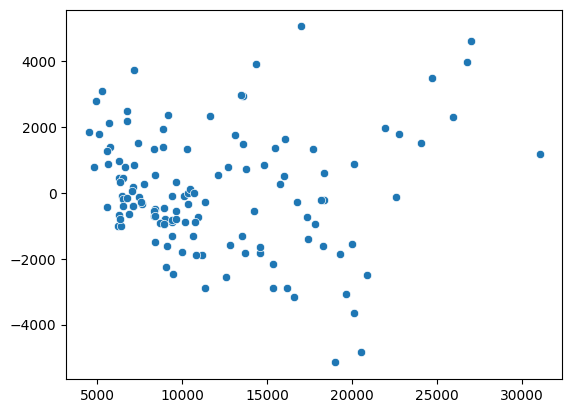

In [66]:
#lets check the hetroscedasticity
res.resid
sns.scatterplot(x=res.fittedvalues,y=res.resid)

there is a funnel shape pattern shown by errors , means there is hetroscedasticity present


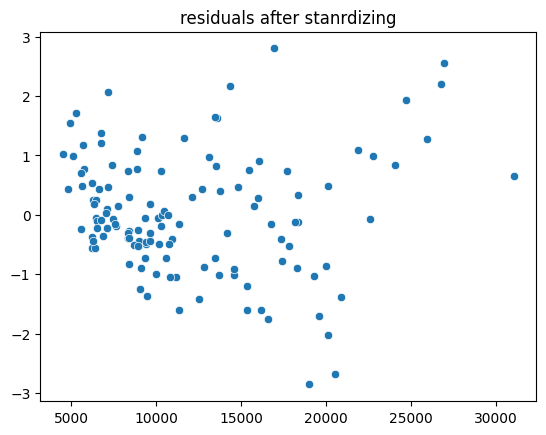

In [67]:
#standrdize the residuals 
resid_standardized= (res.resid-res.resid.mean())/res.resid.std()
sns.scatterplot(x=res.fittedvalues,y=resid_standardized)
plt.title("residuals after stanrdizing")
print('there is a funnel shape pattern shown by errors , means there is hetroscedasticity present')

In [68]:
#rebuilding the model by taking log transformation of x variable to deal with hetroscedasticity
mod=smf.ols(formula='np.log(price) ~ curbweight + horsepower + encoded_CarName + encoded_cylindernumber',data=df_ )
res=mod.fit()
res.resid.mean()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     299.3
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           5.40e-63
Time:                        00:18:39   Log-Likelihood:                 75.730
No. Observations:                 130   AIC:                            -141.5
Df Residuals:                     125   BIC:                            -127.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

Text(0.5, 1.0, 'residuals after stanrdizing')

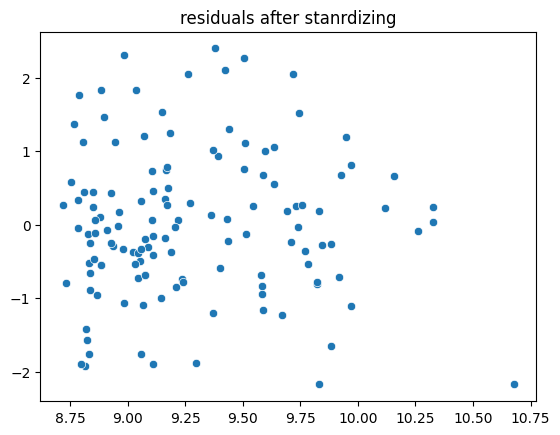

In [69]:
resid_standardized= (res.resid-res.resid.mean())/res.resid.std()
sns.scatterplot(x=res.fittedvalues,y=resid_standardized)
plt.title("residuals after stanrdizing")

In [70]:
pd.concat({'fitted':np.exp(res.fittedvalues).round(),
            'actual':df_.price},axis=1)

,fitted,actual
67,24784.0,25552.0
125,16654.0,22018.0
50,6748.0,5195.0
134,12593.0,15040.0
62,8690.0,10245.0
...,...,...
180,19619.0,15690.0
146,8659.0,7463.0
119,8731.0,7957.0
54,6965.0,7395.0


# Lets build the model using stepwise regression 

In [71]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_stanardized
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21.0,27,13495.0,0.027324
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21.0,27,16500.0,0.403473
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19.0,26,16500.0,0.403473
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24.0,30,13950.0,0.084279
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18.0,22,17450.0,0.522389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23.0,28,16845.0,0.446659
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19.0,25,19045.0,0.722042
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18.0,23,21485.0,1.027468
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26.0,27,22470.0,1.150765


In [72]:
significant_cat_col= pd.Series(significant_cat_col)
#converting into series object and taking only significant columns from dataframe for model
num_col=pd.Series(num_col)
significant_columns = pd.concat([significant_cat_col,num_col])

In [73]:
df_stepwise=pd.DataFrame(df[significant_columns])
df_stepwise.columns

Index(['CarName', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem', 'car_ID', 'symboling',
       'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

### feature encoding starts here 

In [74]:
print(f' we will use one hot encoding for the cat feature were category are less than 3 ,(drivewheel,enginelocation,carbody,aspiration) and will use target encoding where weight of categories are equal to 1 (carname,enginetype,cylindernumber,fuelsystem) \n')
for col in df_stepwise.select_dtypes(exclude=np.number):
    print(df_stepwise[col].value_counts())



 we will use one hot encoding for the cat feature were category are less than 3 ,(drivewheel,enginelocation,carbody,aspiration) and will use target encoding where weight of categories are equal to 1 (carname,enginetype,cylindernumber,fuelsystem) 

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
fou

In [75]:
#encoding use one_hot encodding
df_stepwise=pd.get_dummies(data=df_stepwise,columns=['enginelocation','drivewheel','aspiration','carbody'])

### lets compare target encoding (m estimator) output for all three ways  

In [76]:
#fucntion for doing mestimator target encoding -using category_encoders 
#method -1 

from category_encoders import MEstimateEncoder

for col in df_stepwise[['CarName','enginetype','cylindernumber','fuelsystem']]:
    encoder= MEstimateEncoder(cols=[col],m=10)
    encoded_column='encoded_'+col
    df_stepwise[encoded_column]=encoder.fit_transform(df_stepwise[col],df_stepwise['price'])
    




In [77]:
#fucntion for doing mestimator target encoding -user defined function

#Method 2

import category_encoders    
from category_encoders import TargetEncoder

def calulate_smooth_Targetmean(df,feature,target,m):
    #mathmatical equation for target encoding using smoothing is:- ((n*x_bar) + (m*w))/(n+m)
    #where n = no of values we have  ,w=overall mean , m = any noise value 
    
    #calculate the overall mean 'w'(target mean)
    w = df[target].mean()
    
    #calculate the number of observation(counts) and mean for each group in category varibale
    agg= df.groupby(feature)[target].agg(['count','mean'])
    n=agg['count']
    x_bar= agg['mean']
    
    #compute the smooth mean
    smooth_mean= ((n*x_bar) + (m*w))/(n+m)
    print(smooth_mean)
    return df[feature].map(smooth_mean)
    
    

    
    


In [78]:
#lets check the smooth mean of feature carName
df_test_targetencoding= pd.DataFrame({'feature column' : df_stepwise['fuelsystem'], 'encoded_mean':calulate_smooth_Targetmean(df_stepwise,feature='fuelsystem',target='price',m=10)})
df_test_targetencoding

fuelsystem
1bbl    10279.909796
2bbl     8241.119812
4bbl    13015.546593
idi     14984.336857
mfi     13248.282337
mpfi    17324.036276
spdi    12193.742406
spfi    13074.100519
dtype: float64


,feature column,encoded_mean
0,mpfi,17324.036276
1,mpfi,17324.036276
2,mpfi,17324.036276
3,mpfi,17324.036276
4,mpfi,17324.036276
...,...,...
200,mpfi,17324.036276
201,mpfi,17324.036276
202,mpfi,17324.036276
203,idi,14984.336857


In [79]:
pd.concat([df_test_targetencoding,df_stepwise['encoded_fuelsystem']],axis=1)

print("we can say that both methods exact same values for target encoding")

we can say that both methods exact same values for target encoding


In [80]:
corr=df_stepwise.corr()
print(corr['price'].sort_values(ascending=False))


price                     1.000000
encoded_CarName           0.898397
curbweight                0.835305
horsepower                0.808139
encoded_cylindernumber    0.743969
carwidth                  0.707942
carlength                 0.683082
drivewheel_rwd            0.638957
enginesize                0.610864
encoded_fuelsystem        0.593019
wheelbase                 0.573244
boreratio                 0.553173
encoded_enginetype        0.450826
enginelocation_rear       0.324973
carbody_hardtop           0.225854
carbody_convertible       0.187681
aspiration_turbo          0.177926
carbody_sedan             0.125716
stroke                    0.079443
compressionratio          0.067984
carbody_wagon            -0.042310
drivewheel_4wd           -0.058866
symboling                -0.079978
peakrpm                  -0.085267
car_ID                   -0.109093
aspiration_std           -0.177926
carbody_hatchback        -0.262039
enginelocation_front     -0.324973
drivewheel_fwd      

##### now lets drop all catogory features  and get all numerical columns

In [81]:
df_stepwise.drop(columns=df_stepwise.select_dtypes(include=object),axis=1,inplace=True)

### Let check the outliers in target variable and remove it 

All point below this -5284.5 values are outliers
All points above this 29575.5 values are outliers


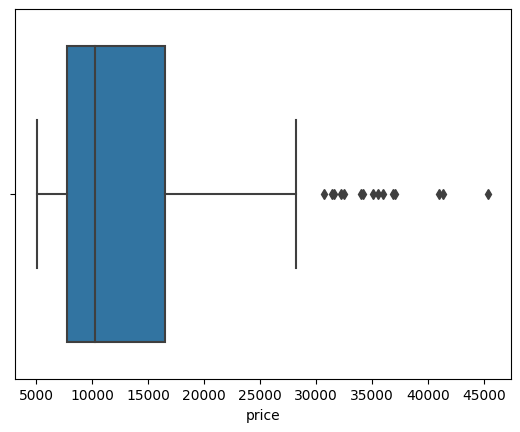

In [82]:
#visualizing the outliers 

sns.boxplot(data=df_stepwise,x='price')

#analyzing the outliers mathmatically

q1= np.percentile(df_stepwise['price'],25,interpolation='midpoint')
q3= np.percentile(df_stepwise['price'],75,interpolation='midpoint')

IQR = (np.percentile(df_stepwise['price'],75)) -(np.percentile(df_stepwise['price'],25))
print(f'All point below this {q1-1.5*(IQR)} values are outliers')
print(f'All points above this {q3+1.5*(IQR)} values are outliers')

In [83]:
#lets remove outliers using z -score method

In [84]:
df_stepwise.drop(index=df[((df['price']-df['price'].mean())/df['price'].std() >3) | (((df['price']-df['price'].mean())/df['price'].std()) < -3)].index,inplace=True)

In [85]:
X=df_stepwise.drop(columns='price',axis=1)
y=df_stepwise['price']

In [86]:
#'price' in df_stepwise.columns

#### Stepwise selection regression model
##### here the p-value is the criteria
#### add features if p-value is less than threshold_in
##### remove features if the p-value is greater than threshold_out

In [382]:
def stepwise_regression(X,y,
                       threshold_in=0.01,
                       threshold_out=0.05,
                       initial_list=[],
                       verbose=True):
    
    """ threshold_in = include a feature if its p-value < threshold_in
    threshold_out= exclude a feature if its p-value > threshold_out
    versbose=whether to print the sequence of inclusions and exclusions
    inital_list= list of features to start with(colume name of X)
    Returns: list of selected features
    
    """
    
    
    
    included= list(initial_list)
    
    while True:
        changed= False
        
        #foreard step
        
        excluded = list(set(X.columns)-set(included))
        new_pval=pd.Series(index=excluded,dtype='float64')
        for new_col in excluded:
            model=sm.OLS(y,sm.add_constant(pd.DataFrame(X[included+[new_col]]))).fit()
            new_pval[new_col]=model.pvalues[new_col]
        best_pval= new_pval.min()
        if best_pval <threshold_in:
            best_feature=new_pval.idxmin()
            included.append(best_feature)
            changed= True
            if verbose:
                print(f' add {best_feature} with p value {best_pval:.3f}')
        
        #backward step
        
        model=sm.OLS(y,sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues=model.pvalues.iloc[1:]
        worst_pvalue=pvalues.max()
        if worst_pvalue>threshold_out:
            changed=True
            worst_feature=pvalues.idxmax()
            included.remove(worst_feature)
            if  verbose:
                print(f'Drop {worst_feature} with p-value {worst_pvalue:.6f}')
        if not changed:
            break
    return included
                      
        
            
        
            
            
            
        
        
    
    

In [383]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [384]:
result=stepwise_regression(X_train,y_train)
print('resulting features')
print(result)

 add encoded_CarName with p value 0.000
 add curbweight with p value 0.000
 add encoded_cylindernumber with p value 0.000
 add horsepower with p value 0.000
 add citympg with p value 0.008
 add carwidth with p value 0.009
 add carbody_convertible with p value 0.003
 add encoded_enginetype with p value 0.000
resulting features
['encoded_CarName', 'curbweight', 'encoded_cylindernumber', 'horsepower', 'citympg', 'carwidth', 'carbody_convertible', 'encoded_enginetype']


In [385]:
result=['encoded_CarName','horsepower']

In [386]:
X_train_stepwise=X_train[result]
X_test_stepwise=X_test[result]

In [387]:
X_train_stepwise=sm.add_constant(X_train_stepwise)


In [388]:
model=sm.OLS(y_train,X_train_stepwise).fit()

In [389]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     441.2
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.12e-60
Time:                        10:49:11   Log-Likelihood:                -1315.2
No. Observations:                 141   AIC:                             2636.
Df Residuals:                     138   BIC:                             2645.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6.483e+04   4008.009    -

### the model shows a good r2 value , lets check model prediction and Evaluation 

In [390]:
#lets check VIF
VIF=pd.DataFrame()
VIF['features']=X_train_stepwise.columns
VIF['vif']= [variance_inflation_factor(X_train_stepwise,i) for i in range(X_train_stepwise.shape[1])]
VIF

,features,vif
0,const,299.581485
1,encoded_CarName,1.842011
2,horsepower,1.842011


##### VIF looks good , means there is no multicolinearity between features


##### model shows  very low r2 as compaired to  train data , and MAPE difference is more than 50% means model has overfitting issues , lets check for hetroscedasticity 

<Axes: >

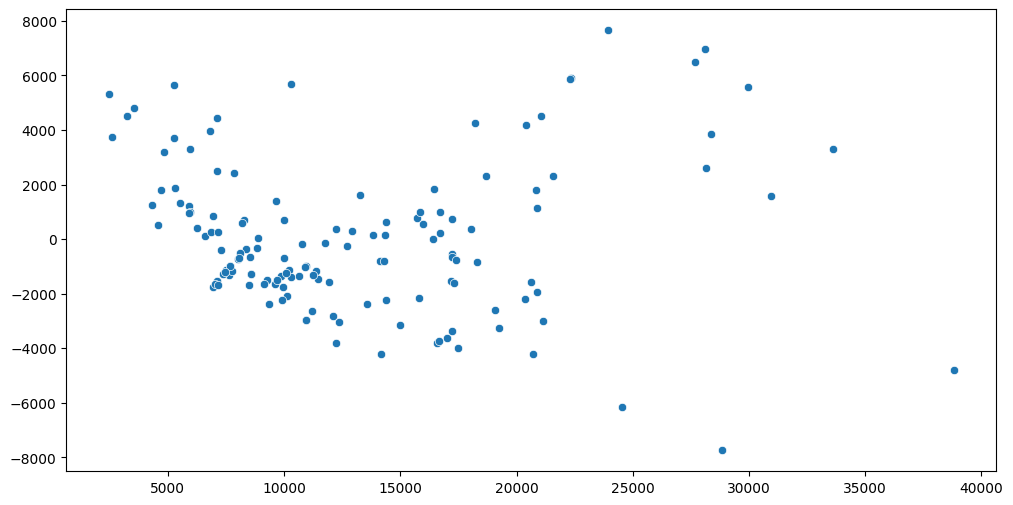

In [391]:
#fitted vs residuals (resdual plot)

fig,ax= plt.subplots(figsize=(12,6))
sns.scatterplot(x=model.fittedvalues,y=model.resid)


<Axes: >

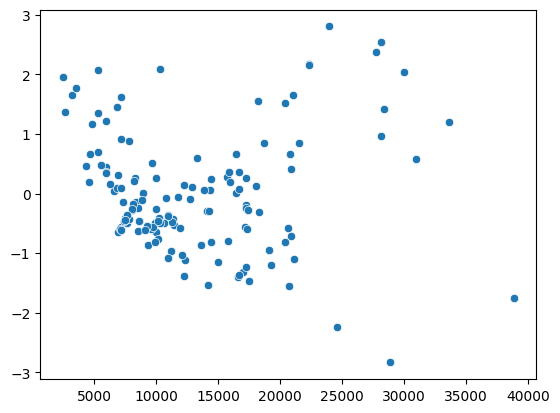

In [392]:
#another way to check hetroscedasticity to see any error pattern with y-variable

err_standardized= (model.resid-model.resid.mean())/model.resid.std()
sns.scatterplot(x=model.fittedvalues,y=err_standardized)

In [393]:
#residual plot shows a a funnel pattern of errors with y variable , lets remove this hetroscedasticity using log transformation
y_train=np.log(y_train)


In [394]:
X_train_stepwise.columns

Index(['const', 'encoded_CarName', 'horsepower'], dtype='object')

In [395]:
X_train_stepwise=X_train[result]
X_train_stepwise=sm.add_constant(X_train_stepwise)
model=sm.OLS(y_train,X_train_stepwise).fit()


In [396]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     413.9
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           4.97e-59
Time:                        10:49:13   Log-Likelihood:                 37.034
No. Observations:                 141   AIC:                            -68.07
Df Residuals:                     138   BIC:                            -59.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.6585      0.274     16.991      0.000       4.116       5.201
encoded_CarName     0.0003   2.38e-05     12.819      0.000       0.000       0.000
horsepower          0.0065      0.001     10.311      0.000       0.005       0.008
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.220
Skew:                           0.026   Prob(JB):                        0.896
Kurtosis:                       2.814   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [397]:
#y_pred=model.predict(X_test_stepwise)
#y_pred
X_test_stepwise

,encoded_CarName,horsepower
202,14186.425476,134
193,12921.008809,88
32,12122.315824,60
49,15342.464155,262
64,12600.161977,84
...,...,...
120,12047.342142,68
107,14086.381607,97
128,15435.918701,207
28,12880.736882,88


<Axes: >

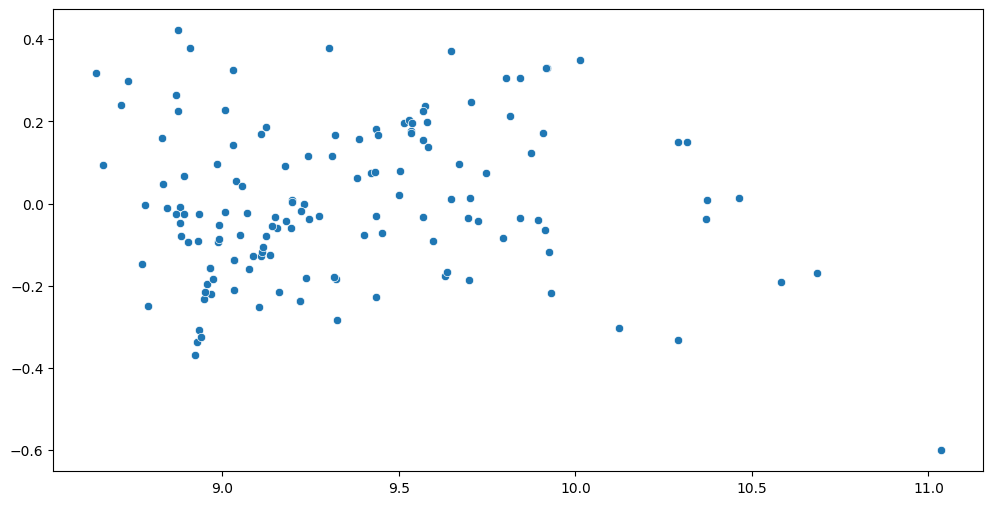

In [398]:
#fitted vs residuals (resdual plot)

fig,ax= plt.subplots(figsize=(12,6))
sns.scatterplot(x=model.fittedvalues,y=model.resid)


In [399]:
y_pred_train=model.predict(X_train_stepwise)

In [400]:
y_test=np.log(y_test)

In [401]:
y_train

67     10.148471
125     9.999616
50      8.555452
134     9.618469
62      9.234545
         ...    
155     9.080004
119     8.981807
54      8.908559
39      9.087608
48     10.478695
Name: price, Length: 141, dtype: float64

In [402]:
print("MAPE    : ", mean_absolute_percentage_error(y_test,  np.exp(y_pred)).round(2), ", ", mean_absolute_percentage_error(np.exp(y_train),  np.exp(y_pred_train)).round(2))

MAPE    :  142217.01 ,  15.17


In [403]:
print("MSE     : ", mean_squared_error(y_test,  np.exp(y_pred)).round(2), ", ", mean_squared_error(y_train,  y_pred_train).round(2))
print("MAPE    : ", mean_absolute_percentage_error(y_test,  y_pred).round(2), ", ", mean_absolute_percentage_error(y_train,  y_pred_train).round(2))
print("R2      : ", r2_score(y_test,  y_pred).round(3), ", ", r2_score(y_train,  y_pred_train).round(3))
print("MAE     : ", mean_absolute_error(y_test,  y_pred).round(2), ", ", mean_absolute_error(y_train,  y_pred_train).round(2))
print("ExpVar  : ", explained_variance_score(y_test,  y_pred).round(3), ", ", explained_variance_score(y_train,  y_pred_train).round(3))  # same as R-sq


MSE     :  383571184.56 ,  0.03
MAPE    :  1.78 ,  1.61
R2      :  0.708 ,  0.857
MAE     :  0.17 ,  0.15
ExpVar  :  0.708 ,  0.857


### we have got got model accuracy (r2) and MAPE , value but this model is not better than manual one   but both models have overfitting issue

# Let use regualarization to overcome overfitting issues 